In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v4) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2025/09/15, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. 

The main graph datasets used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# 11 Building TSL partitioning¶

In this section, the term `node` without specifying a type, refers to a node of type $O$ in the derived growing network $O−(RV/RL)−O$.


To further generalize the topological partitioning introduced in the analysis of the $RV-RV$ subnetwork, we define a classification based on the topological properties of the derived growing network $O-(RV/RL)-O$. In this classification, each node is characterized by its number of incoming edges $T$, outgoing edges $S$, and a Boolean variable $L$, which equals $1$ if the node has a self-loop and $0$ otherwise. Self-loops occur for origin nodes that have at least one associated $RV$ or $RL$ node after partitioning.  

We also introduce the classification depth $\delta_{max}$, defined as the maximum value of $T$ and $S$ considered when defining node types and partitioning the origin nodes.


## a) TSL graph : types and properties

### Node types and properties

### Node Types and Properties

Types `100` and `110` do not occur because a node cannot be the target of another node—including itself—unless it has at least one $RV$ or $RL$ node assigned to it after partitioning. This implies that it must have a self-loop, i.e., $L = 1$.

Therefore, a rule for the non-occurence of a `TSL` type is: a node cannot have $T > 0$ while having $L = 0$. 
For example, we summurize in the next table, the possible `TSL` types for origin nodes when $\delta_{max} = 1$, 

Therefore, a rule for the non-occurrence of a `TSL` type is the following: a node cannot have $T > 0$ while having $L = 0$.
The following table summarizes the possible `TSL` types for origin nodes when $\delta_{\text{max}} = 1$.


| O nodes properties / Type ($\delta_{max}=1$)               |`000`|`010`|`001`|`011`|`111`|`101`|`100`|`110`|
|---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Does not exist                                         |     |     |     |     |     |     |  X  |  X  |
| At least one $RV$ or $RL$ node BEFORE partitionning             |     |  X  |  X  |  X  |  X  |  X  |  -  |  -  |
| At least one $RV$ or $RL$ node AFTER partitionning (Self Loop)  |     |     |  X  |  X  |  X  |  X  |  -  |  -  |
| At least one distinct $O$ node pointing toward this node |     |     |     |     |  X  |  X  |  -  |  -  |
| Pointing toward at least one distinct $O$ node           |     |  X  |     |  X  |  X  |     |  -  |  -  |
  

The `TSL` type of a node can change over time and the evolution rules for types are constrained. A `001` node becomes a `101` node as soon as a $O$ node points to it.


Here, since the temporal partitioning rule is not incremental, we choose— for the sake of simplicity— to fix each node’s `TSL` type over time by retaining its most recently known type. Generalizing this approach does not pose any significant difficulty. 

This choice is analogous to not systematically orienting edges according to a broader principle of causality, and to discussing the graph's properties while preserving either the topological direction (source node toward target node) or the arrow of time, as previously mentioned.


### Edges types and properties

The `TSL`type of an edge connecting a source node with index $I_s$ to a target node $I_t$ aisre given by `TSL(I_s)>TSL(I_t)`. When distinguishing edges corresponding to self-loops ($I_s=I_t$) from others, we introduce the notation `TSL=TSL`. In this case, `TSL(I_s)>TSL(I_t)` only refers to edges between distinct nodes.

Not all edge types resulting from the combination of node types are possible.

The **impossible** types are, for example (here, we distinguish between `TSL=TSL` and `TSL>TSL`):
- `TSL>TS0` and `TSL=TS0`: An edge must necessarily point to a node possessing at least one $RV$ or $RL$ node after partitioning, which implies $L[I_t]=1$. This also means that selfloop must necessarily be of type `TS1=TS1`.
- `T0L>TSL` and `TSL>1SL`: No edge can exist if the source node is not such that $S[I_s]\ge 1$, or the target node such that $T[I_t]\ge 1$. However, all combinations of `TS1=TS1` are possible.

Hence, the rules for the non-existence of the `TSL>TSL` type are as follows:
- **Excluding self-loops**:
    - $L_t=0$
    - $S_s=0$
    - $T_t=0$
- **Including self-loops**
    - ($T_s=T_t$, $S_s=S_t$, and $L_s=L_t$):
    - $L_t=0$ and ($T_s \ne T_t$ or $S_s \ne S_t$ or $L_s \ne L_t$)
    - $S_s=0$ and ($T_s \ne T_t$ or $S_s \ne S_t$ or $L_s \ne L_t$)
    - $T_t=0$ and ($T_s \ne T_t$ or $S_s \ne S_t$ or $L_s \ne L_t$)


Here we modified the function `DisplayTypeStats` returning the types of nodes and edges, using a non mandatory parameter `depth`. $depth\ne None$ means using TSL type for node of the derived $O-(RV/RL)-O$ network.


## b) Main stats

### TSL($\delta_{max}=1$)

In [3]:
Inheritance=True
if Inheritance:
    InheritancePath="BigO"
    print("Derived graph with edge inheritance")
else:
    print("Derived graph without edge inheritance")
    InheritancePath="L0"
nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)


Derived graph with edge inheritance
Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01


In [5]:
DisplayStat=False
if DisplayStat:
    FilePath=exportpath+"TSL_O-O-"+InheritancePath+"-ORI-depth=1_20241010.pkl"
    statsoutput=DisplayTypeStats(nodes,edges,d,depth=1,Debug=False,FilePath=FilePath)
    print("SAVED ",FilePath)

**With default inhertance rule**

**Without default inhertance rule**

**Comment**: The inheritance rule does not affect the $TSL$ node statistics for $\delta_{max} = 1$, but it does modify the $TSL$ edge statistics.


### TSL($\delta_{max}=2$)

In [21]:
DisplayStat=False
if DisplayStat:
    print("InheritancePath",InheritancePath)
    FilePath=exportpath+"TSL_O-O-"+InheritancePath+"-ORI-depth=2_20241010.pkl"
    statsoutput=DisplayTypeStats(nodes,edges,d,depth=2,Debug=False,FilePath=FilePath)    
    print("SAVED ",FilePath)

## c) New Nodes/Edges per month over time

In [4]:
Rebuild=False
Fsave=False
DisplayStat=True

Inheritance=True

if Inheritance:
    InheritancePath="BigO"
    print("Derived graph with edge inheritance")
else:
    print("Derived graph without edge inheritance")
    InheritancePath="L0"
nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)


Derived graph with edge inheritance
Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01


In [ ]:
# nodes creation over time (per type per month)
if Rebuild:
    print("InheritancePath",InheritancePath)
    print(" BigO == WITH INHERITANCE | LO ==  WITHOUT INHERTIANCE")

    stat={}
    ti=time.time()
    
    depth=1
    Verbose=False
    stat=BuildNodesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,depth=depth)
    tf=time.time()
    print("BuildNodesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    if Verbose:print(stat.keys())
    # BuildNodesTimeStampHisto Elapse  144.0
    # edges creation over time (per type per month)
    ti=time.time()
    stat=BuildEdgesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,depth=depth)
    tf=time.time()
    print("BuildEdgesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    if Verbose:print(stat.keys())
    
    if Fsave:
        filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_TSL_1970_2030_20241010.pkl"
        pickle.dump(stat,open(filename,"wb"))
        print("SAVED ",filename)

### Creation rate of egdes / new nodes

INHERITANCE PATH BigO
 BigO == WITH inheritance | LO ==  WITHOUT inheritance
LOAD  ./Data/stat_nodes_edges_O-O_BigO_TSL_1970_2030_20241010.pkl


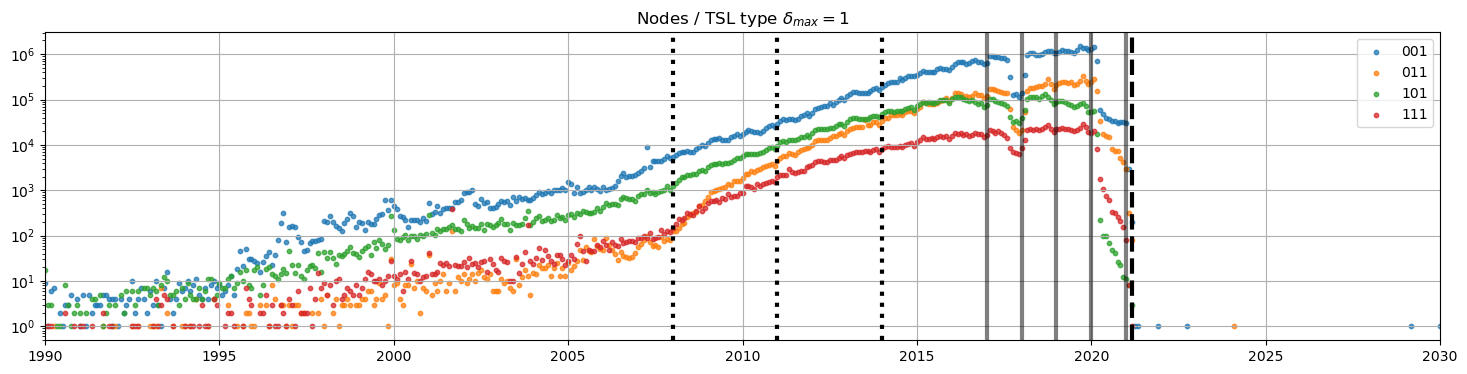

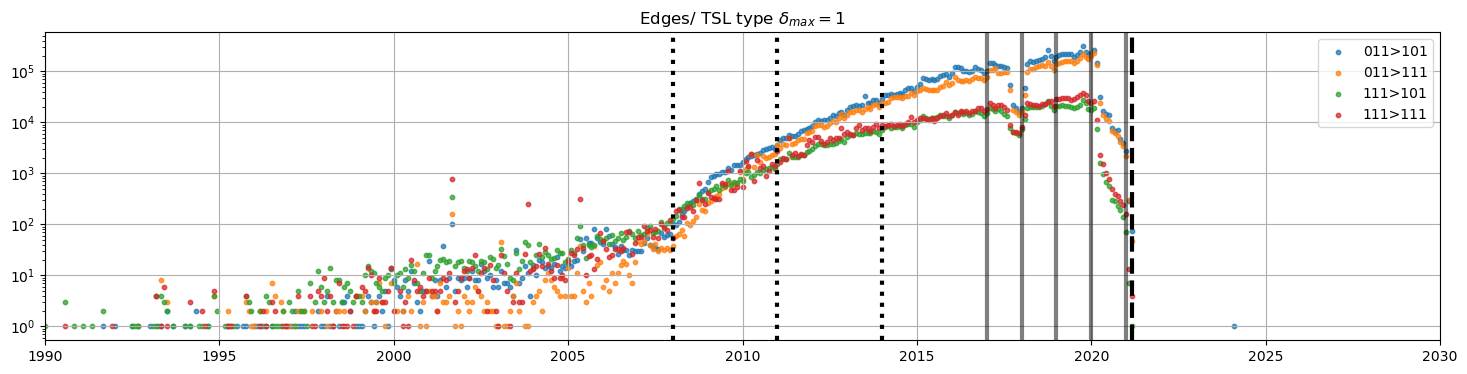

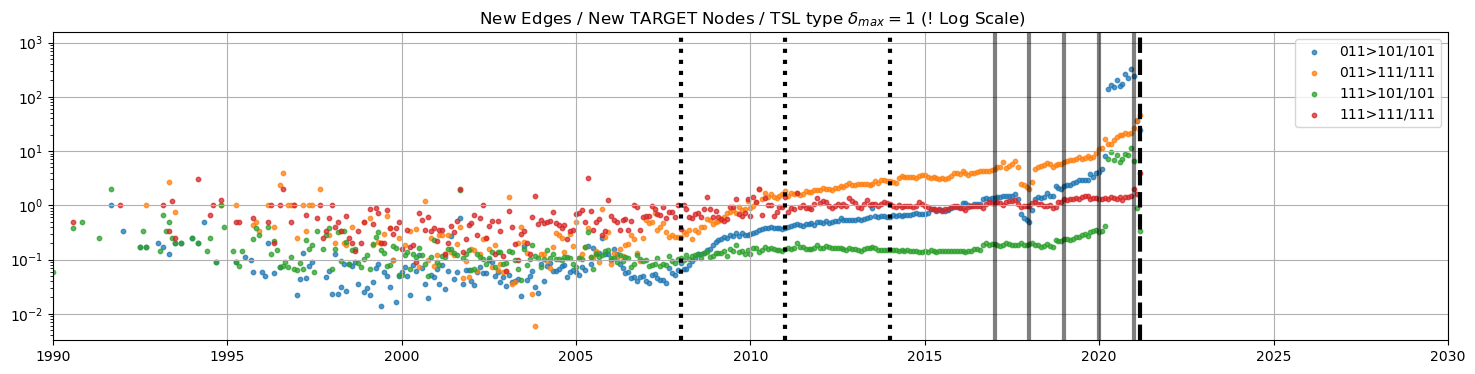

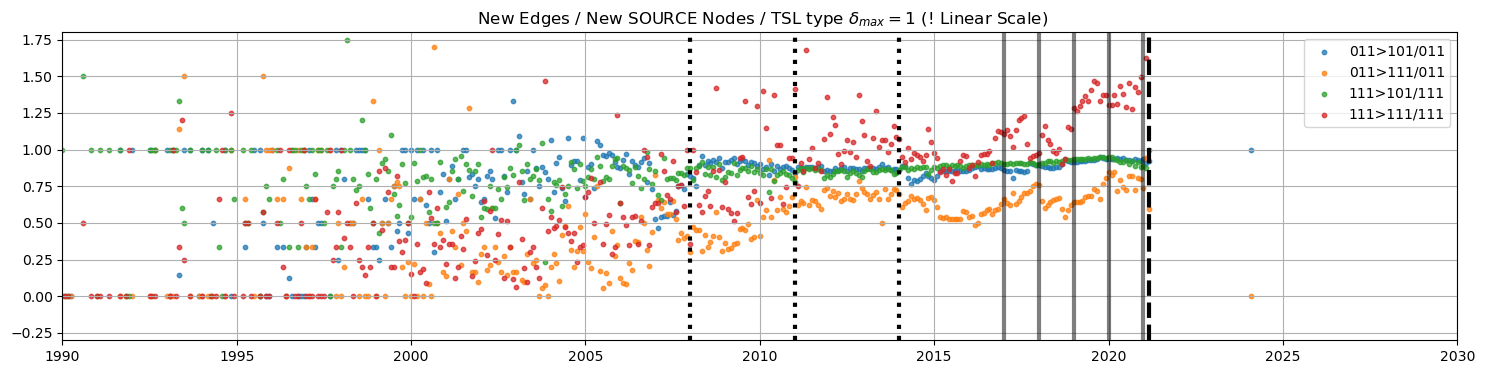

In [20]:
if DisplayStat:
    print("INHERITANCE PATH",InheritancePath)
    print(" BigO == WITH inheritance | LO ==  WITHOUT inheritance")
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_TSL_1970_2030_20241010.pkl"
    print("LOAD ",filename)
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    height=4
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        plt.xlim(1990,2030)
        for year in [2017,2018,2019,2020,2021]:
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()
        
    
    x=np.arange(1634)/12+1970
    plt.figure(figsize=(18,height))
    plt.title(r'Nodes / TSL type $\delta_{max}=1$')
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" not in key:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    VerticalLinesLocal()
    plt.show()
    plt.figure(figsize=(18,height))
    plt.title(r'Edges/ TSL type $\delta_{max}=1$')
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    VerticalLinesLocal()
    plt.show()
    plt.figure(figsize=(18,height))
    plt.title(r' New Edges / New TARGET Nodes / TSL type $\delta_{max}=1$ (! Log Scale)')
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2 # length of node type
            plt.scatter(x,value/stat[key[-length:]],s=10,label=key+"/"+key[-length:],alpha=0.75)
    plt.yscale('log')
    VerticalLinesLocal()
    plt.show()
    plt.figure(figsize=(18,height))
    plt.title(r' New Edges / New SOURCE Nodes / TSL type $\delta_{max}=1$ (! Linear Scale)')
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2 # length of node type
            plt.scatter(x,value/stat[key[:length]],s=10,label=key+"/"+key[:length],alpha=0.75)
    #plt.yscale('log')
    plt.ylim(-0.3,1.8)
    VerticalLinesLocal()
    plt.show()

**Comment**

These figures, illustrating the evolution of the number of nodes and edges by $TSL$ type and per month, demonstrate that this classification effectively captures distinct growing regimes.

For instance, in the first figure, one can observe that the monthly number of new `101` and `111` nodes does not follow the same trend as for `001` and `011` nodes. Similarly, it is useful to examine whether the number of new edges per month can be expressed as a simple function of the number of newly introduced source or target nodes.

However, the fluctuations observed in some monthly averages make interpretation more difficult. Moreover, the impact of anomalies identified in the data at the end of 2017 and the beginning of 2018 — as well as in the months leading up to the export date — can be seen in nearly all of these figures (with the exception of the `New Edges/New Source Nodes` ratio).

This may, in turn, directly affect the incoming degree distributions after 2018, and consequently the associated measurements.


### Comparing with and without inheritance rules

In the case with inheritance rule, one expects a newly created `011` node to generate as many outgoing edges as there are `111` and `101` nodes in its descendant graph. Consequently, the average number of outgoing edges per `011` node is expected to increase over time, at least transiently.

To verify the presence and assess the magnitude of this effect while reducing fluctuations, the previous figure suggests partially aggregating the data and representing the following quantities:

- `011>(111,101)/011`: the number of new outgoing edges from `011` nodes divided by the number of new `011` nodes,
- `111>(111,101)/111`: the number of new outgoing edges from `111` nodes divided by the number of new `111` nodes.

For each of these observables, we also plot and comment the ratio **with inheritance / without inheritance**.


In [10]:
if DisplayStat:
    stat={}
    for InheritancePath in ["BigO","L0"]:
        filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_TSL_1970_2030_20241010.pkl"
        print("LOAD ",filename)
        stat[InheritancePath]=pickle.load(open(filename,"rb"))
    # displaying all curves
    height=4
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        plt.xlim(1998,2022)
        for year in [2017,2018,2019,2020,2021]:
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()
        
    x=np.arange(1634)/12+1970 #(month index since EPOCH => year decimal
        

LOAD  ./ExportData/stat_nodes_edges_O-O_BigO_TSL_1970_2030_20241010.pkl
LOAD  ./ExportData/stat_nodes_edges_O-O_L0_TSL_1970_2030_20241010.pkl


- `011>(111,101)/011`: the number of new outgoing edges from `011` nodes divided by the number of new `011` nodes,

!! Y scale between 0 and 3 is used to ease comparision with the next figure !!


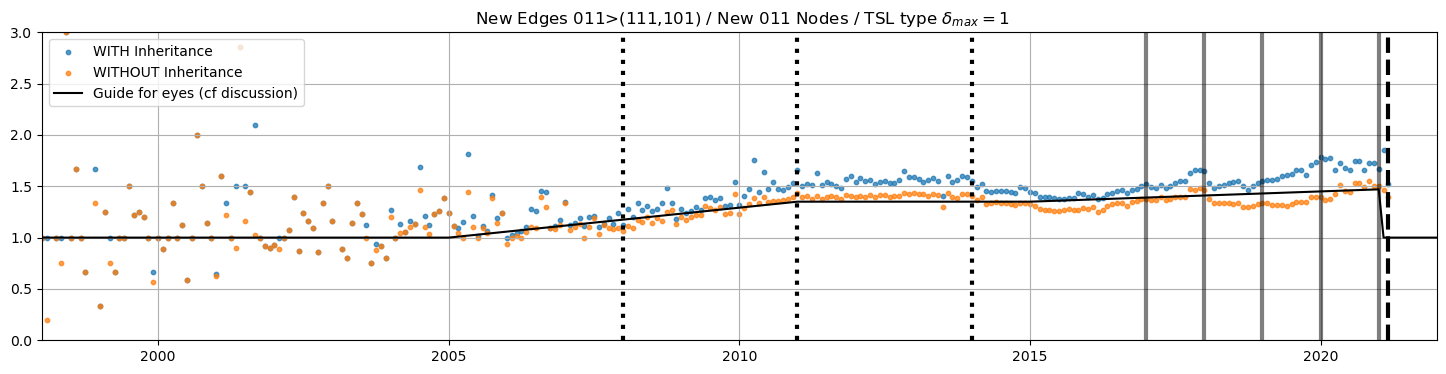

In [17]:
if DisplayStat:
    # 011>(111,101)/011
    yBigO=(stat["BigO"]["011>111"]+stat["BigO"]["011>101"])/stat["BigO"]["011"]
    yL0=(stat["L0"]["011>111"]+stat["L0"]["011>101"])/stat["L0"]["011"]
    Ratio011=yBigO/yL0
    plt.figure(figsize=(18,height))
    plt.title(r' New Edges 011>(111,101) / New 011 Nodes / TSL type $\delta_{max}=1$')
    plt.scatter(x,yBigO,s=10,label="WITH Inheritance",alpha=0.75)
    plt.scatter(x,yL0,s=10,label="WITHOUT Inheritance",alpha=0.75)
    #plt.scatter(x,yBigO/yL0,s=10,label=key+"/"+key[:length]+" (WITHOUT Inheritance)",alpha=0.75)
    #plt.yscale('log')
    ypline=np.ones_like(x)
    mask=np.logical_and(2005<x,x<=2011)
    ypline[mask]=1+(x[mask]-2005)/(2011-2005)*(1.35-1)
    mask=np.logical_and(2011<x,x<=2021)
    ypline[mask]=1.35
    mask=np.logical_and(2015<x,x<=2021)
    ypline[mask]=1.35+(x[mask]-2015)/(2021-2016)*(1.45-1.35)    
    plt.plot(x,ypline,"k",label="Guide for eyes (cf discussion)")    

    VerticalLinesLocal()
    plt.ylim(0,3) # ! few points are outside this range. 
    print("!! Y scale between 0 and 3 is used to ease comparision with the next figure !!")
    plt.show()

- `111>(111,101)/111`: the number of new outgoing edges from `111` nodes divided by the number of new `111` nodes.

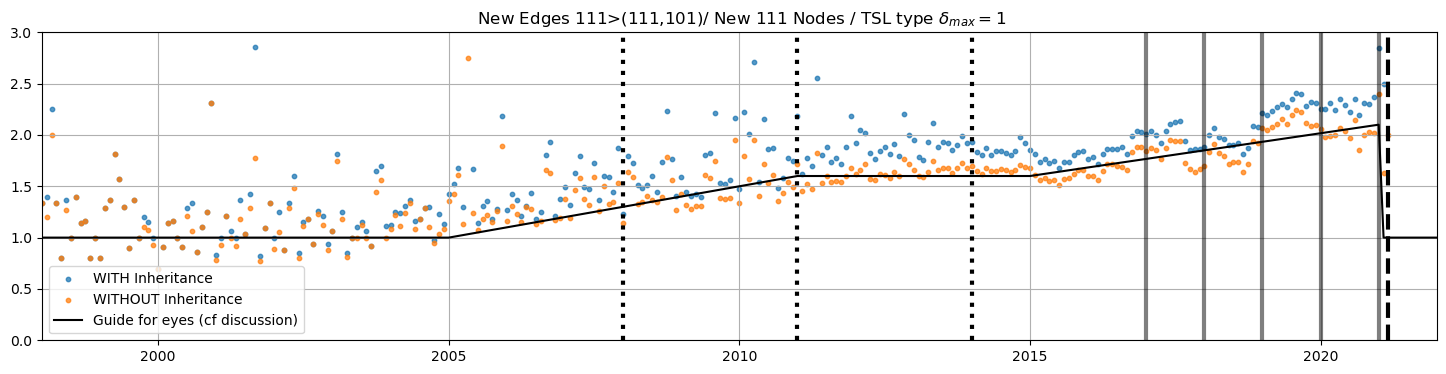

In [18]:
if DisplayStat:
    yBigO=(stat["BigO"]["111>111"]+stat["BigO"]["111>101"])/stat["BigO"]["111"]
    yL0=(stat["L0"]["111>111"]+stat["L0"]["111>101"])/stat["L0"]["111"]
    Ratio111=yBigO/yL0
    plt.figure(figsize=(18,height))
    plt.title(r' New Edges 111>(111,101)/ New 111 Nodes / TSL type $\delta_{max}=1$')
    plt.scatter(x,yBigO,s=10,label="WITH Inheritance",alpha=0.75)
    plt.scatter(x,yL0,s=10,label="WITHOUT Inheritance",alpha=0.75)
    #plt.scatter(x,yBigO/yL0,s=10,label=key+"/"+key[:length]+" (WITHOUT Inheritance)",alpha=0.75)
    #plt.yscale('log')
    #plt.axhline(y=1.6,color="k",alpha=0.5,label="y=1.6")
    # guide for the eye (see discussionà
    ypline=np.ones_like(x)
    mask=np.logical_and(2005<x,x<=2012)
    ypline[mask]=1+(x[mask]-2005)/(2011-2005)*(1.6-1)
    mask=np.logical_and(2011<x,x<=2015)
    ypline[mask]=1.6
    mask=np.logical_and(2015<x,x<=2021)
    ypline[mask]=1.6+(x[mask]-2015)/(2021-2015)*(2.1-1.6)
    
    plt.plot(x,ypline,"k",label="Guide for eyes (cf discussion)")
    VerticalLinesLocal()
    plt.ylim(0.,3) # ! few points are outside this range
    plt.show()

**Comment**:  
Modulo the previously discussed caveats regarding the assumptions and methodological choices underlying the construction of the $O-(RV/RL)-O$ graph, we can observe the following. 

The average number of edges originating from "root" nodes of type `011` increases over time starting from the 2005–2008 period.

For both metrics, and regardless of the inheritance rule applied, the hypothesis of a constant average number of new nodes equal to 1 prior to 2005 appears plausible.

From 2005 onwards, alternating phases of growth and/or plateaus at values greater than 1 are observed, although we cannot exclude the possibility of a single period instead.

For the second metric, `111 > (111, 101)/111`, a clear upward trend is visible from 2015 onward. In contrast, the first metric, `011 > (111, 101)/011`, shows a weaker or possibly slower increase. Notably, this transition precedes the earliest anomalies identified in the dataset in early 2018 and in the year preceding the export date. It is important to note that node types are fixed based on their status at the time of export. As such, both the later evolution of the graph and anomalies observed after 2017 may retroactively influence the metrics discussed above.

Although precisely delineating distinct post-2005 periods remains an open question (potentially addressable through more recent dataset exports), there is little doubt that a fundamental shift in growth dynamics occurred before and after 2005, independently of the inheritance rule used, even if the existence and nature of a second transition around 2015–2016 remains more uncertain. 

- Comparing the Ratios with/without Inheritance

The significant impact of the different inheritance rules, from the perspective of minimal growth models, motivates a more detailed investigation of how this rule influences the growth dynamics of the two resulting derived networks.

By definition, the number of new nodes under the inheritance rule is greater than or equal to that obtained without inheritance. We can therefore represent and analyze the ratio of these quantities over time in order to assess the specific influence of the rules.

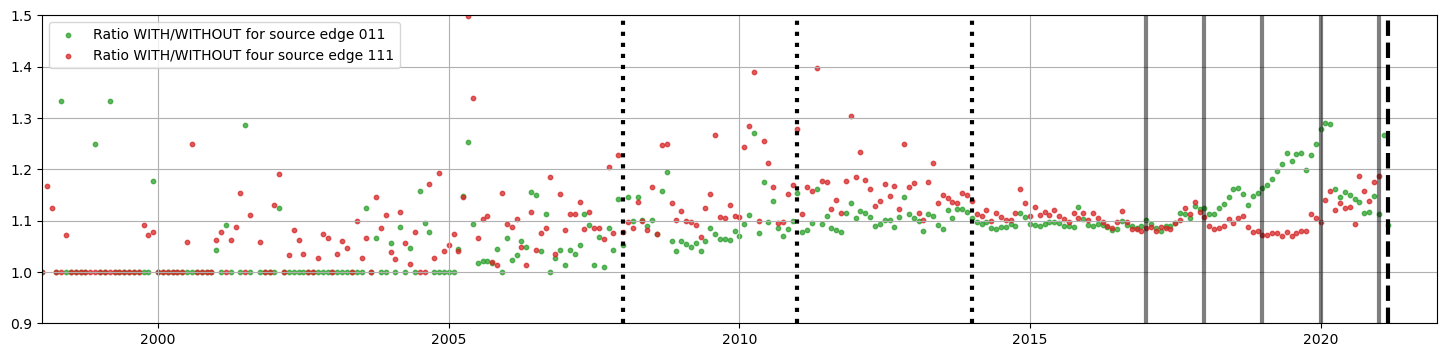

In [19]:
if DisplayStat:
    plt.figure(figsize=(18,height))
    #plt.title(r' New Edges 111>(111,101) / New 111 Nodes | TSL type $\delta_{max}=1$')
    #plt.scatter(x,yBigO,s=10,label=key+"/"+key[:length]+" (WITH Inheritance)",alpha=0.75)
    #plt.scatter(x,yL0,s=10,label=key+"/"+key[:length]+" (WITHOUT Inheritance)",alpha=0.75)
    plt.scatter(x,Ratio011,color="tab:green",s=10,label="Ratio WITH/WITHOUT for source edge 011",alpha=0.75)
    plt.scatter(x,Ratio111,color="tab:red",s=10,label="Ratio WITH/WITHOUT four source edge 111",alpha=0.75)
    #plt.yscale('log')
    VerticalLinesLocal()
    plt.ylim(0.9,1.5) # ! few points are outside this range
    plt.show()


Four distinct periods can be identified:

- **Before 2005** (the appearance of the `git` tool): no difference is observed between the two graph construction rules.
- **Between 2011/2012 and 2017**: a ratio around 1.1 is observed, confirming an excess of edges under the inheritance rule—this excess remains constant for the first metric (green), and shows a decreasing trend for the second (red).
- **Between 2005 and 2011**: a transition connecting the previous periods.
- **A sharp increase** starting in 2018 for the first metric (green), and from 2020 for the second (red).

The excess observed between 2005 and 2017 is consistent with the expected behavior.

The two increase periods (starting in 2018 and in 2020) coincide with anomalies identified in the raw dataset, suggesting that these deviations may result from data-induced biases.

Overall, the change in the growth regime starting in 2005 appears independently of the inheritance rule used. The choice of rule seems to have limited visible impact, apart from a difference in the average number of new edges per new node, and possibly a decline over time for this value in the second metric (red).

Once again, a similar study based on a more recent dataset would be required to clarify the situation further.


###  Histograms of the signed edge timestamp differences

In [9]:
Rebuild=True
if Rebuild:
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath="BigO")
    arraytypeOO,encodingOO,sourcearrayTSOO,targetarrayTSOO,deltaTSOO=GetEdgeTs(nodes,edges,nodesad,d,Nnodes,Nedges)
    arraytypeTSL,encodingTSL,sourcearrayTSTSL,targetarrayTSTSL,deltaTSTSL=GetEdgeTs(nodes,edges,nodesad,d,Nnodes,Nedges,depth=1)
    del nodes,edges,nodesad,d,Nnodes,Nedges

Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.1 (s)
Mask Building  0.13 (s)
95,293,525 valid edges over a total of 156,682,302 i.e. 60.82 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  1.29 (s)
Applying Mask  1.03 (s)
Building edge type array and applying mask 0.71 (s)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.11 (s)
Mask Building 

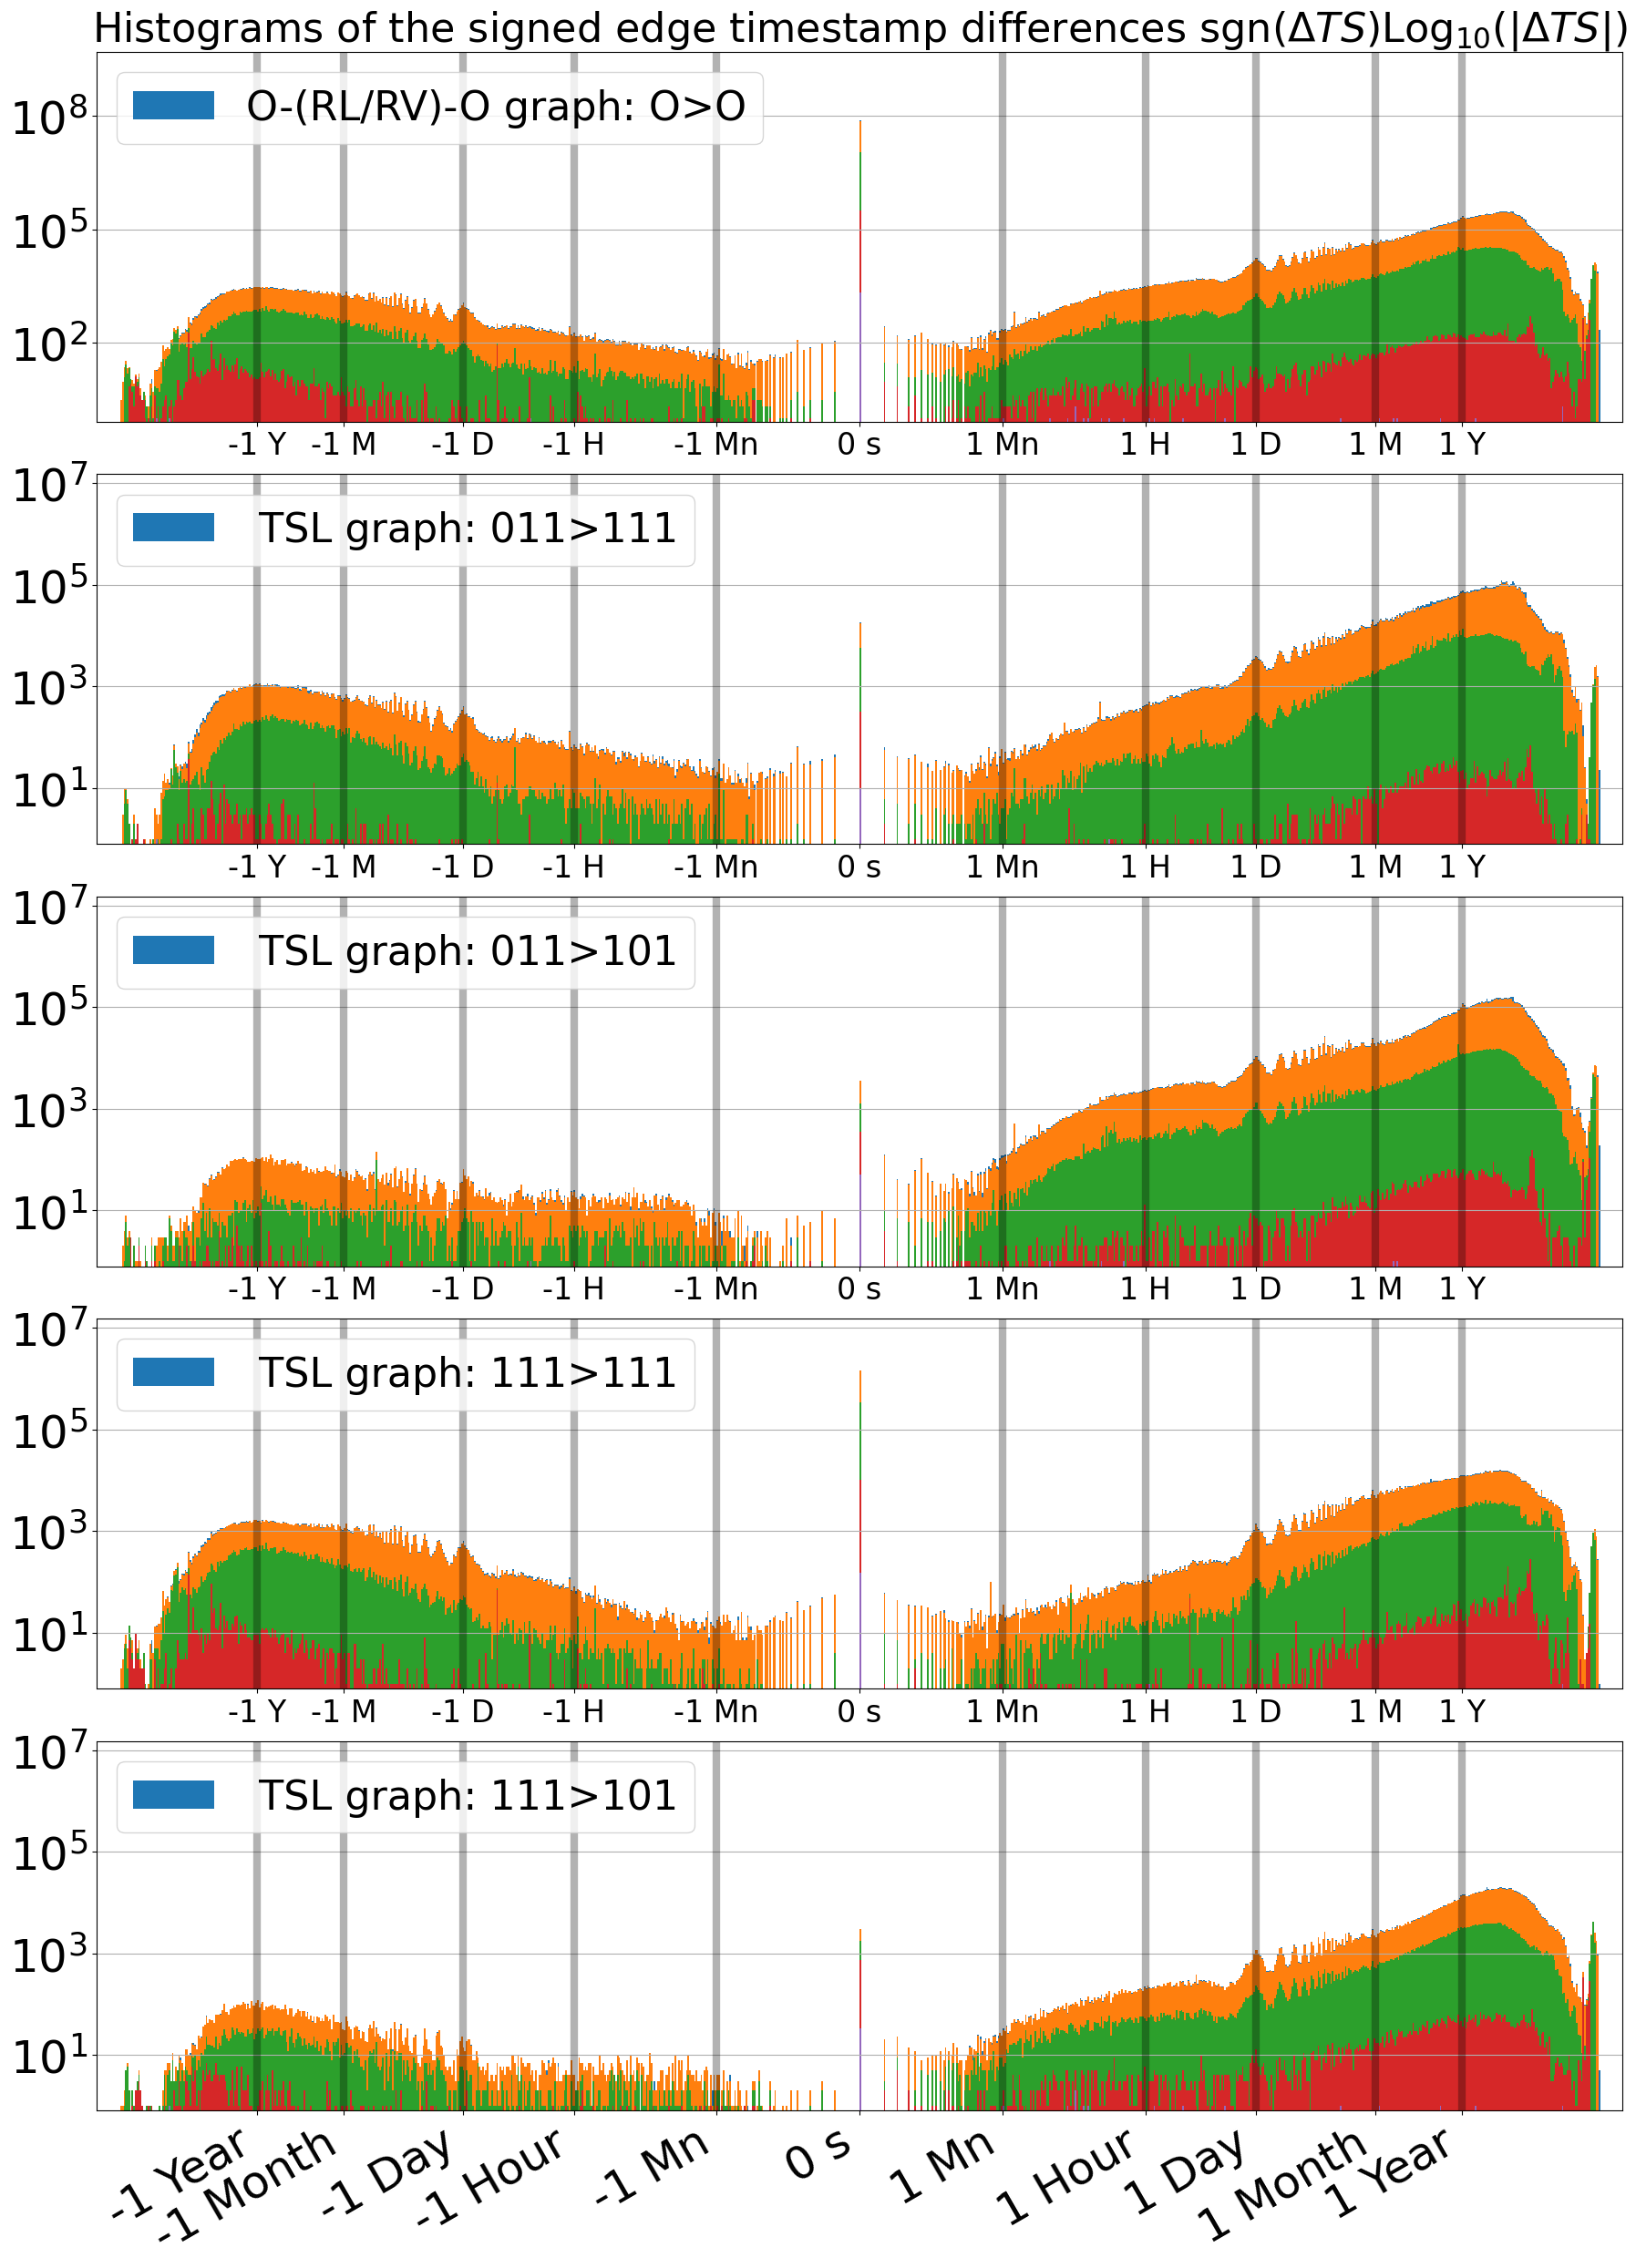

In [10]:
# same but for one graph and mask based on max(sourceTS,edges)<Year
# python script 
# ! image is saved in exportpath
if True and Rebuild:
    
    nfig=5
    fontsize=36
    lw=6


    mn=60;hour=60*60;day=24*hour;week=7*day;year=365*day;month=year/12
    x=np.arange(1634)/12+1970
    
    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    string1=r'Histograms of the signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$'
    #string2='Vertical black lines : -1Year/-1Week/-1Days/-1Hour/-1mn/0s/1mn/1Hour/1Day/1Week/1Year'
    #plt.title(string1+'\n'+string2,fontsize=fontsize-4)

    #plt.title("Edge Type :"+Etype+"\n ")

    
    ax=nfig*[None]

    ax[0] = plt.subplot2grid((nfig, 3), (0, 0),colspan=3)  
    ax[1] = plt.subplot2grid((nfig, 3), (1, 0),colspan=3)  
    ax[2] = plt.subplot2grid((nfig, 3), (2, 0),colspan=3)  
    ax[3] = plt.subplot2grid((nfig, 3), (3, 0),colspan=3)  
    ax[4] = plt.subplot2grid((nfig, 3), (4, 0),colspan=3)  


    ax[0].set_title(string1,fontsize=fontsize-4)

    xticks=[-np.log10(year),-np.log10(month),-np.log10(day),-np.log10(hour),-np.log10(mn),0,
            np.log10(mn),np.log10(hour),np.log10(day),np.log10(month),np.log10(year)]

    xtick_labels = ['-1 Y','-1 M','-1 D','-1 H','-1 Mn','0 s','1 Mn','1 H','1 D','1 M','1 Y']
    for i in range(nfig-1):
        ax[i].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)
        ax[i].set_xticks(xticks)    
        ax[i].set_xticklabels(xtick_labels,fontsize=24,ha='center')    

        
    xtick_labels = ['-1 Year','-1 Month','-1 Day','-1 Hour','-1 Mn','0 s','1 Mn','1 Hour','1 Day','1 Month','1 Year']
    ax[nfig-1].set_xticks(xticks)    
    ax[nfig-1].set_xticklabels(xtick_labels,fontsize=28,rotation=30,ha='right')    
    ax[nfig-1].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)

    for axtmp in ax:
        axtmp.grid(axis='y')
        axtmp.set_yscale("log")
        #axtmp.set_xscale("log")

    xmin=nfig*[-9.5]
    xmax=nfig*[9.5]
    ymin=nfig*[0.8]
    ymax=[5e9,1.5e7,1.5e7,1.5e7,1.5e7]
      
    for i in range(nfig):
        ax[i].set_xlim(xmin[i],xmax[i])
        ax[i].set_ylim(ymin[i],ymax[i])
        
    YEARlist=[2019,2014,2008,1990]
    for iax,encodingTmp,arraytypeTmp,deltaTSTmp,targetarrayTStmp,sourcearrayTStmp,EtypeTmp,model in [
        (0,encodingOO,arraytypeOO,deltaTSOO,targetarrayTSOO,sourcearrayTSOO,'O>O','O-(RL/RV)-O graph'),
        (1,encodingTSL,arraytypeTSL,deltaTSTSL,targetarrayTSTSL,sourcearrayTSTSL,'011>111',' TSL graph'),
        (2,encodingTSL,arraytypeTSL,deltaTSTSL,targetarrayTSTSL,sourcearrayTSTSL,'011>101',' TSL graph'),
        (3,encodingTSL,arraytypeTSL,deltaTSTSL,targetarrayTSTSL,sourcearrayTSTSL,'111>111',' TSL graph'),
        (4,encodingTSL,arraytypeTSL,deltaTSTSL,targetarrayTSTSL,sourcearrayTSTSL,'111>101',' TSL graph'),
        
    ]:

        i=np.where(np.array(encodingTmp)==EtypeTmp)[0][0]
        
        # take YEAR into account
        mask_type=arraytypeTmp==i  
        typed_deltaTS=deltaTSTmp[mask_type]
        h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
       # ax[iax].hist(h,bins='rice',density=False,log=True,label=model+': '+EtypeTmp,alpha=1)
        ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,label=model+': '+EtypeTmp,alpha=1)

        for YEAR in YEARlist:
            mask_type=arraytypeTmp==i         
            mask_type=np.logical_and(mask_type,np.maximum(targetarrayTStmp,sourcearrayTStmp)<=(YEAR+1-1970)*12)
            typed_deltaTS=deltaTSTmp[mask_type]
        
            h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
            ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1)
                
        # vertical line 1mn, 1H, 1D,1W,1Y
        for xv in [mn,day,hour,month,year]:
            ax[iax].axvline(x=np.log10(xv),color='k',alpha=0.3,lw=lw)
            ax[iax].axvline(x=-np.log10(xv),color='k',alpha=0.3,lw=lw)
        ax[iax].legend(loc="upper left",fontsize=fontsize-4,ncol=1,markerscale=1)
    
    plt.tight_layout()

    plt.show()

    

## d) TSL in/out degree histograms 

In [7]:
Rebuild=True
Fsave=Rebuild
version="20250524"

Inheritance=False

if Inheritance:
    InheritancePath="BigO"
    print("Derived graph with edge inheritance")
else:
    print("Derived graph without edge inheritance")
    InheritancePath="L0"
    
if Rebuild:
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)
    # not optimal, but just a copy paste of previous cells
    ti=time.time()
    depth=1
    Debug=False
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d,depth,Debug)
    #Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d,depth,Debug)
    
    ti=time.time()
    sourceedges=GetSourceEdge(nodes)
    #sourceType=Nodestype[sourceedges]
    sourceTSM=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    #targetType=Nodestype[edges]
    targetTSM=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    
    TSM=np.maximum(sourceTSM,targetTSM)
    del sourceTSM,targetTSM
    dout={}
    din={}
    # permute edges to swith to TT
    # can update timestamp and/or source/target
    # here only TT (no perutation of source and target)
    
    # excluding selfloop
    mask=sourceedges!=edges
    
    GetPerTypesDegreeStats(sourceedges[mask],edges[mask],None,Edgestype[mask],Edgesencoding,
                           dout,din,Nnodes,PerFlag="EDGE",FlagMonth=True,TSM=TSM[mask])   
    
    
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_"+version+".pkl"
        pickle.dump((dout,din),open(filename,"wb"))
        print("SAVED ",filename)


Derived graph without edge inheritance
Loaded : nodes_o_derived_O-RVRL-O_L0_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_L0_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Source Type and TimesTamp Building elapse :  2.64 (s)
Target Type and TimesTamp Building elapse :  1.96 (s)
Start Per EDGE types 
Start type 010>101 / 38,189,286 edges | 1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
Start type 011>101 / 8,518,869 edges | 1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
Start type 111>101 / 1,199,159 edges | 1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
1980 0 1984 6 1989 0 1993 6 1998 0 2002 6 2007 0 2011 6 2016 0 2020 6 2025 0 
Per edges types elapse :  3455.96 (s)
SAVED  ./ExportData/degreeInOutHisto_TT_O-O_L0_T

**Comment** Origin nodes without $RV$ or $RL$ nodes after partitionning have timestamp$=2^{32}-1$. Histograms associated to year "3000" include all edges. It explains why histograms corresponding for instance to `010>111`or `010>101`edges are empty for years/months before 2108.

LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20241008.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_L0_TSL_Month_1980_2025_20241008.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
--------------------------------------------------------------------------------


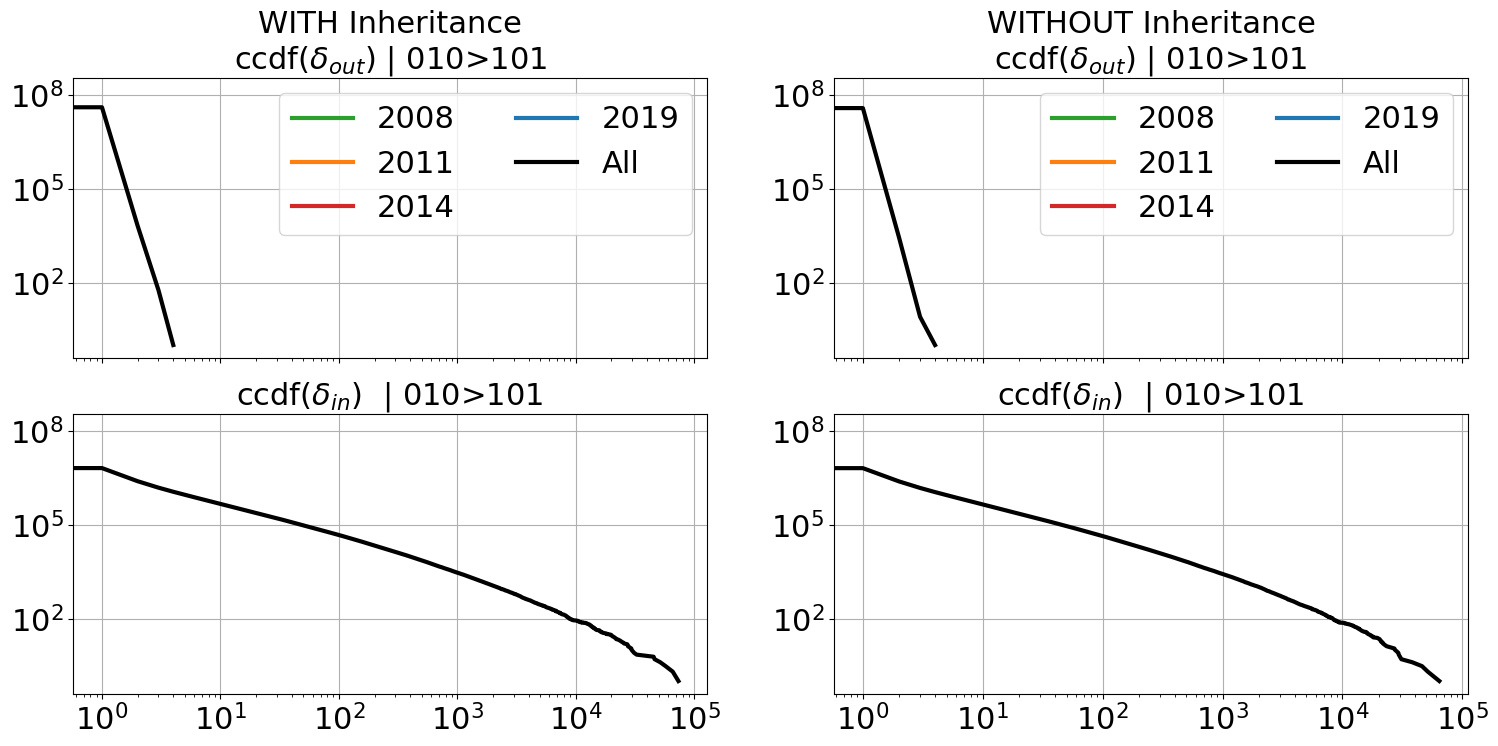

--------------------------------------------------------------------------------


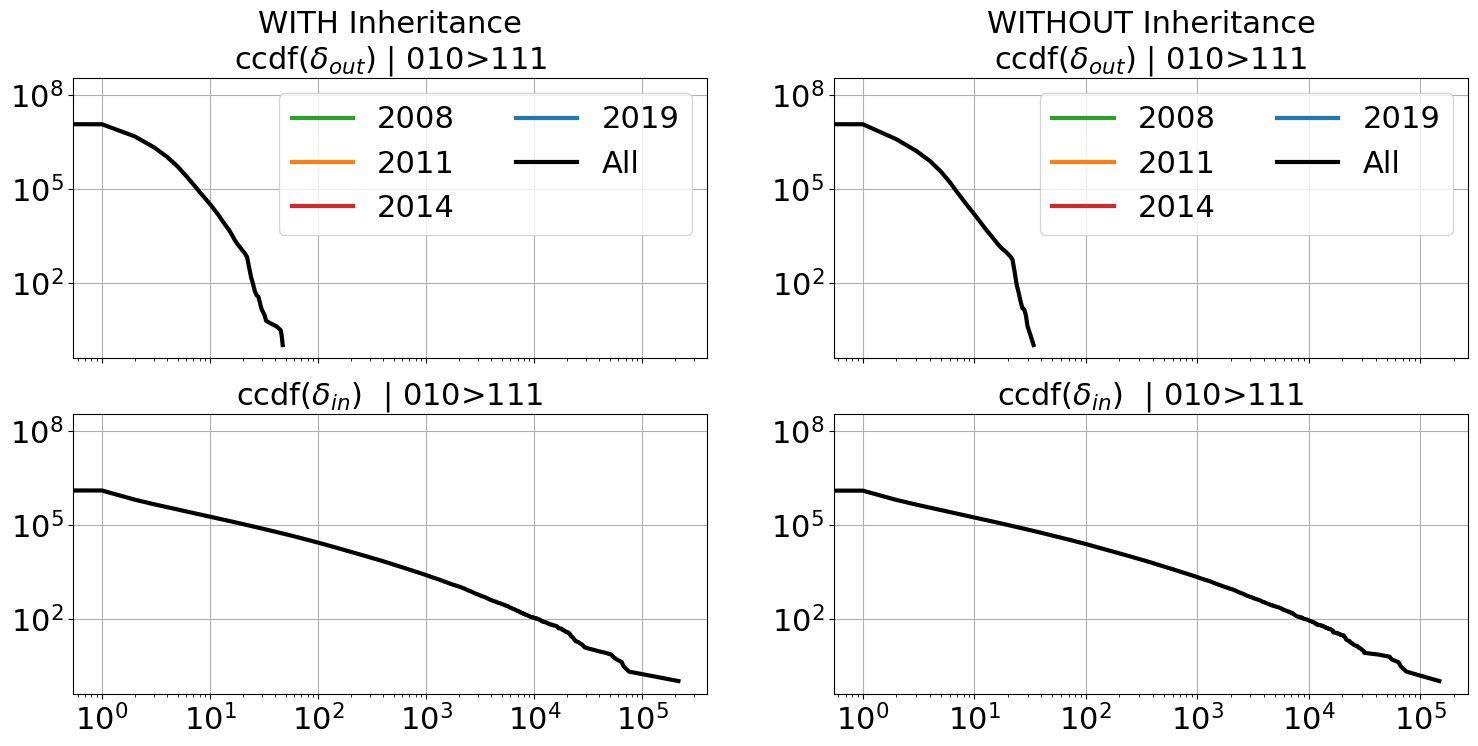

--------------------------------------------------------------------------------


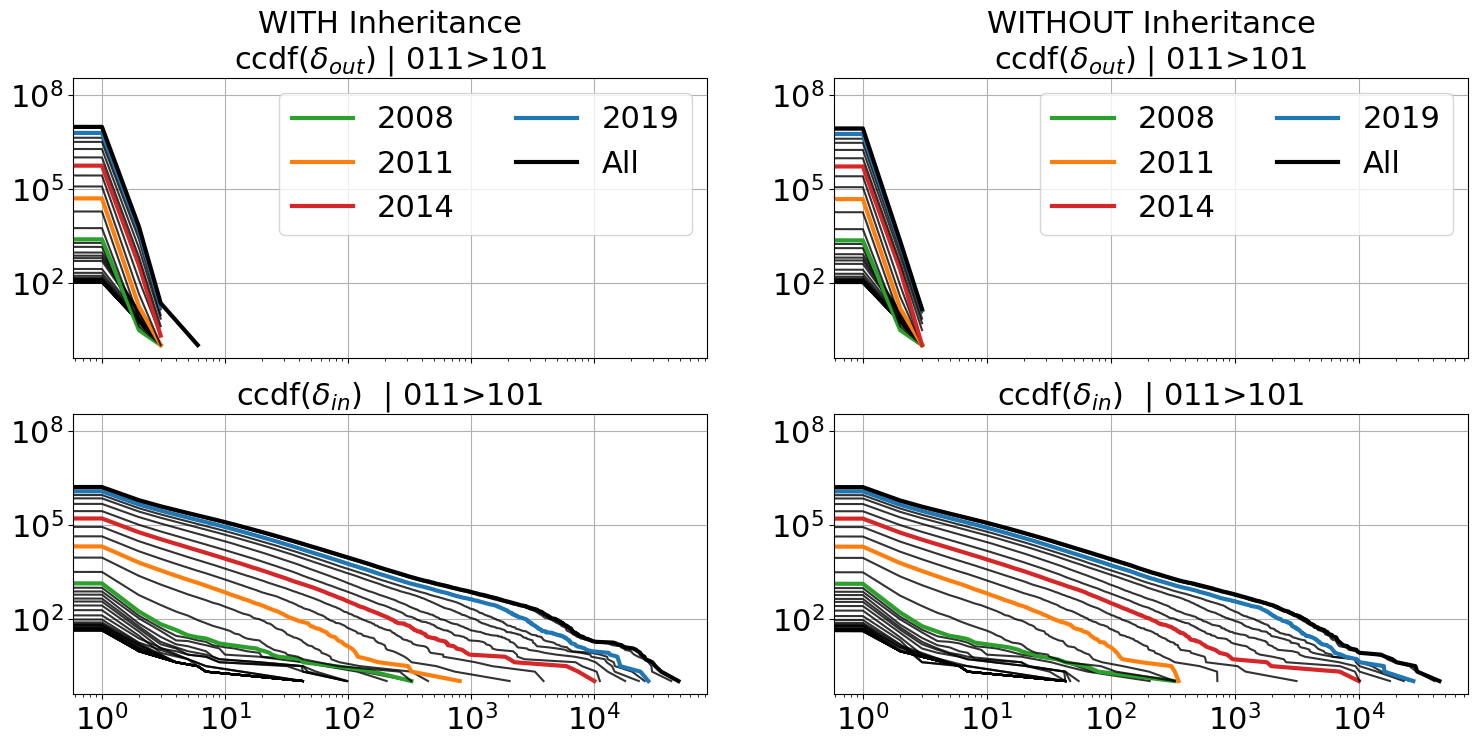

--------------------------------------------------------------------------------


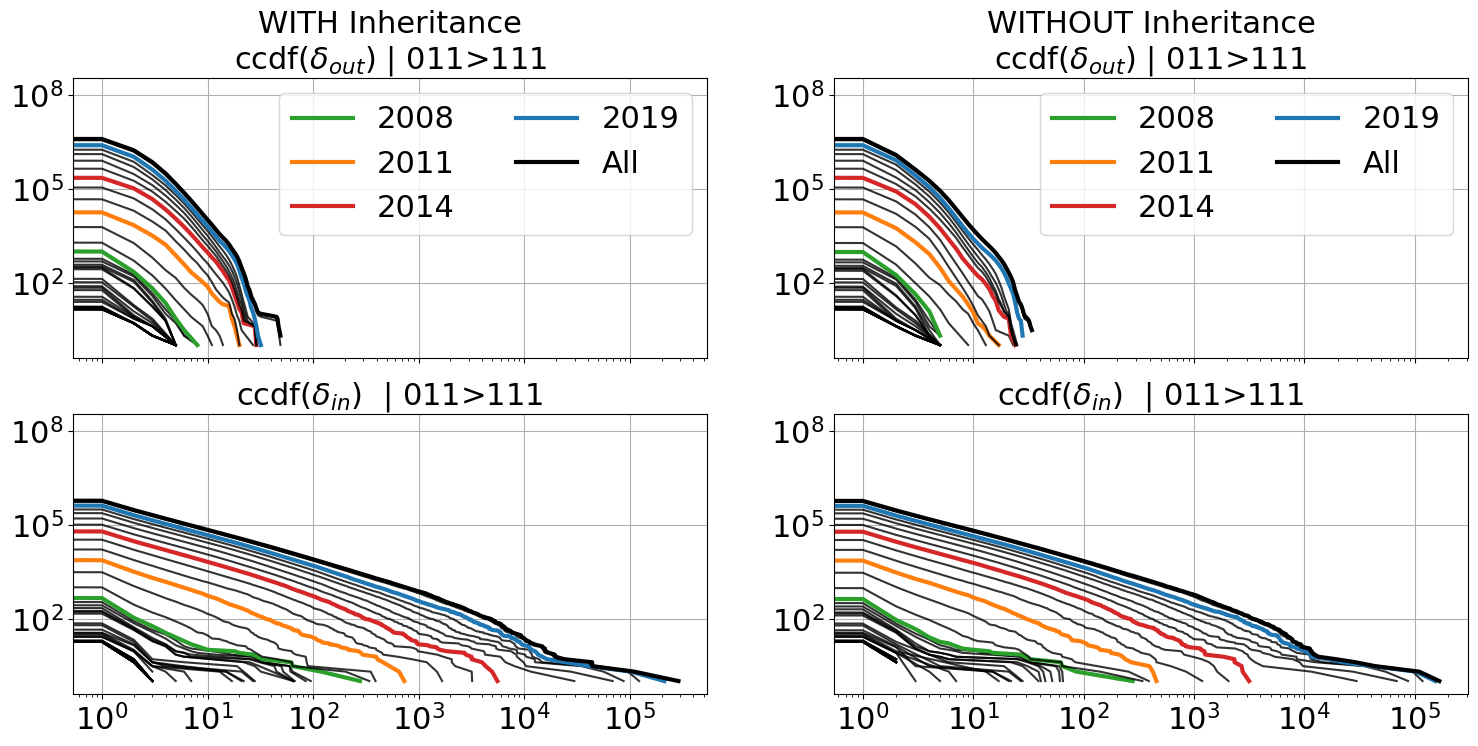

--------------------------------------------------------------------------------


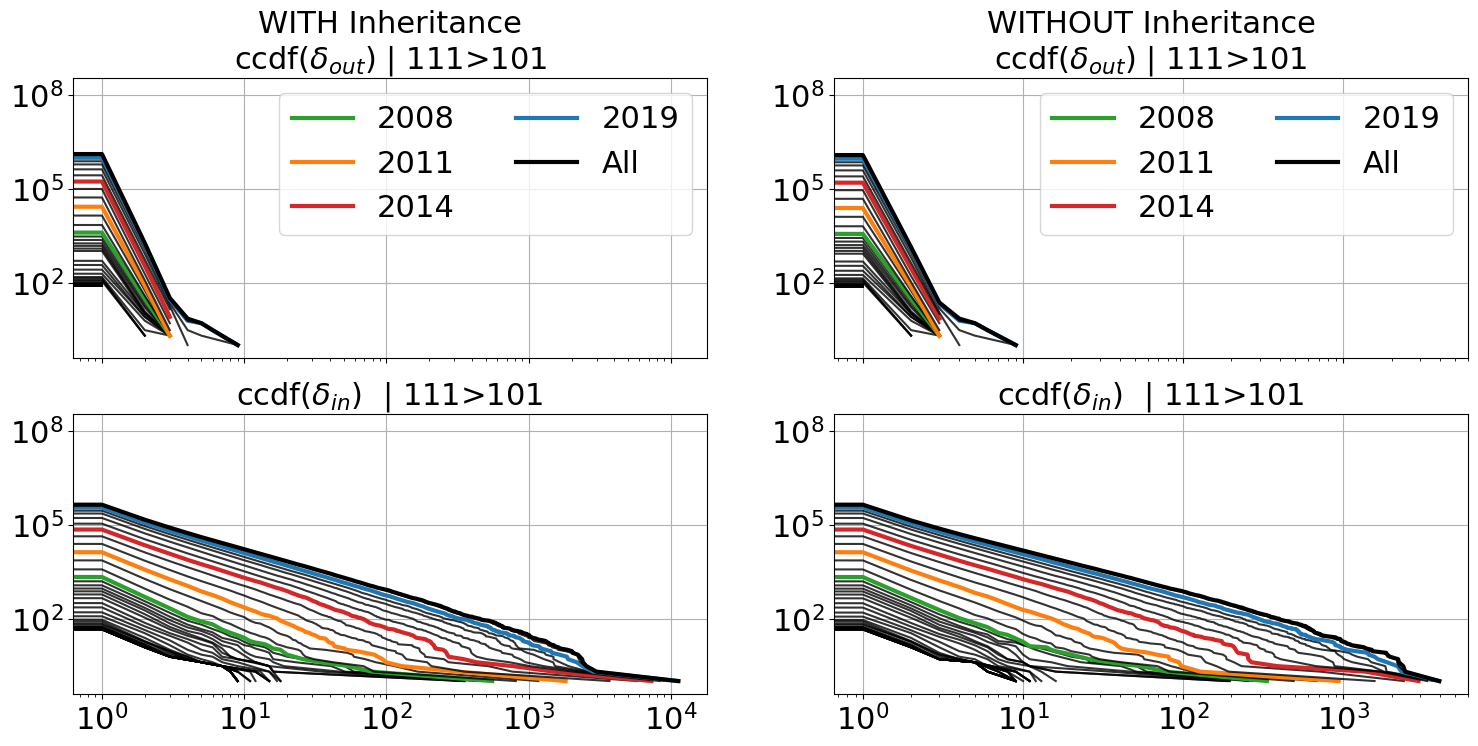

--------------------------------------------------------------------------------


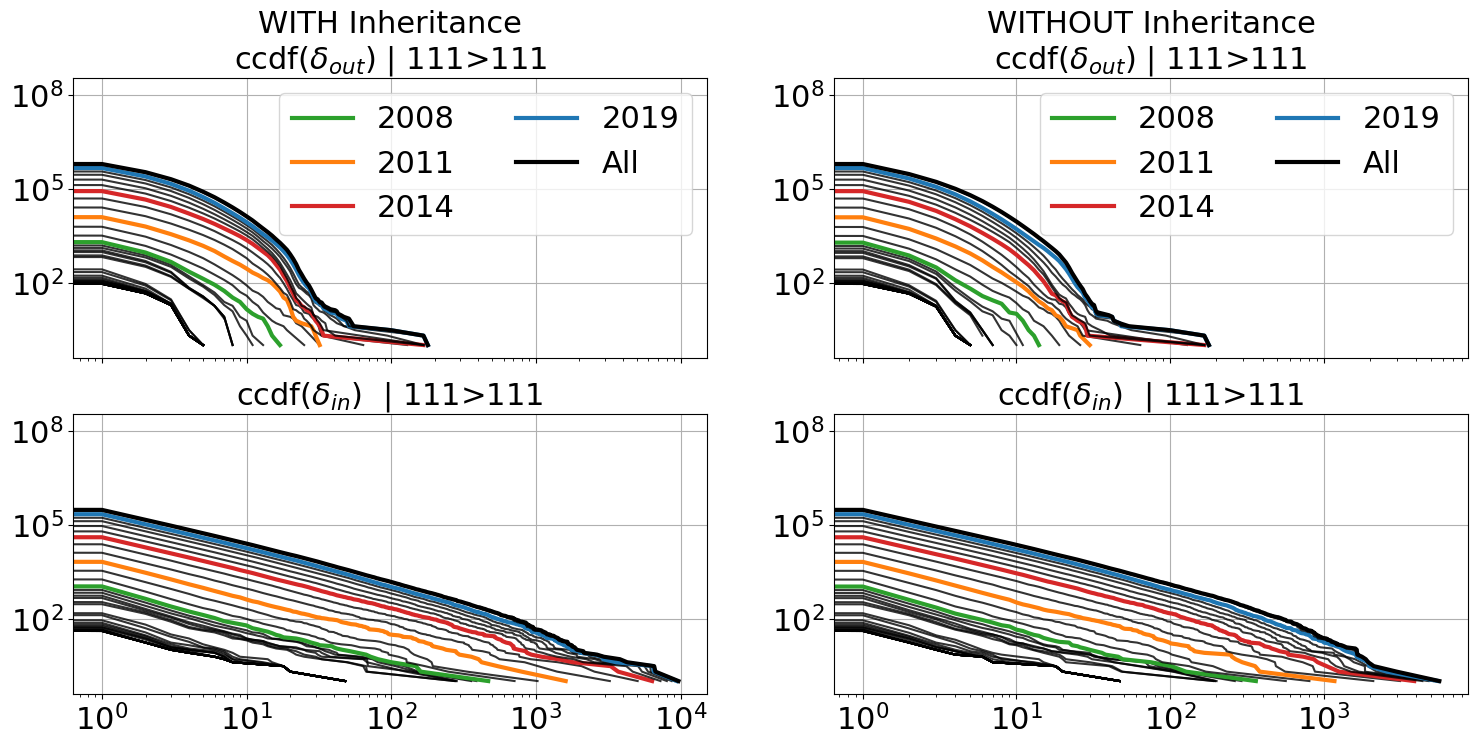

In [11]:
DisplayStat=True
if DisplayStat:
    #for InheritancePath,label in [("BigO","WITH Inheritance"),("L0","WITHOUT Inheritance")]:
    dout={}
    din={}
    for InheritancePath,label in [("BigO","WITH Inheritance"),("L0","WITHOUT Inheritance")]:
        
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_20241008.pkl"
        dout[InheritancePath],din[InheritancePath]=pickle.load(open(filename,"rb"))
        print("LOAD ",filename)
        print("dout.keys()",dout[InheritancePath].keys())
        print("din.keys() ",din[InheritancePath].keys())
    nfig=2
    fontsize=FontSize[nfig]-10
    
    # ccdf or df
    if True:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('y',"df")
    
    
    YearList=[2008,2011,2014,2019,3000]
    ColorList=["tab:green","tab:orange","tab:red","tab:blue","k"]
    for s in dout["BigO"].keys():
    #for s in ["O>O"]:
        # ONLY FOCUS on "O>O", others are the same
        print("-"*80)
        #print(s)
        fig, axs = plt.subplots(nfig,2,figsize=(18,4*nfig),sharex='col')   
        #plt.tight_layout()
        for i in [0,1]:
            for j in [0,1]:
                axs[i,j].grid()
                axs[i,j].set_yscale("log")
                axs[i,j].set_xscale("log")
                axs[i,j].tick_params(axis='both',which='major',labelsize=fontsize)
            
        for InheritancePath,label,j in [
            ("BigO","WITH Inheritance",0),
            ("L0","WITHOUT Inheritance",1)
        ]:
            for kmonth in dout[InheritancePath][s].keys(): # ! month
                if kmonth%12==0: 
                    year=kmonth//12
                    if year in YearList:
                        c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                        labeltmp=str(year)
                        if year ==3000:
                            labeltmp="All"
                        axs[0,j].plot(dout[InheritancePath][s][kmonth]["x"],dout[InheritancePath][s][kmonth][key],markersize=0.5,c=c,lw=3,label=labeltmp)
                        axs[1,j].plot(din[InheritancePath][s][kmonth]["x"],din[InheritancePath][s][kmonth][key],markersize=0.5,c=c,lw=3,label=labeltmp)
                    else:
                        axs[0,j].plot(dout[InheritancePath][s][kmonth]["x"],dout[InheritancePath][s][kmonth][key],markersize=0.5,c="k",alpha=0.8)
                        axs[1,j].plot(din[InheritancePath][s][kmonth]["x"],din[InheritancePath][s][kmonth][key],markersize=0.5,c="k",alpha=0.8)
            axs[1,j].set_title(field+r'$(\delta_{in})$  | '+s,fontsize=fontsize)
            axs[0,j].set_title(label+'\n'+field+r'$(\delta_{out})$ | '+s,fontsize=fontsize)
            axs[0,j].legend(loc='upper right',fontsize=fontsize,ncol=2,markerscale=2)
        plt.show()

LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20241008.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_L0_TSL_Month_1980_2025_20241008.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
----------------------------------------------------------------------------------------------------------------------------------------------------------------


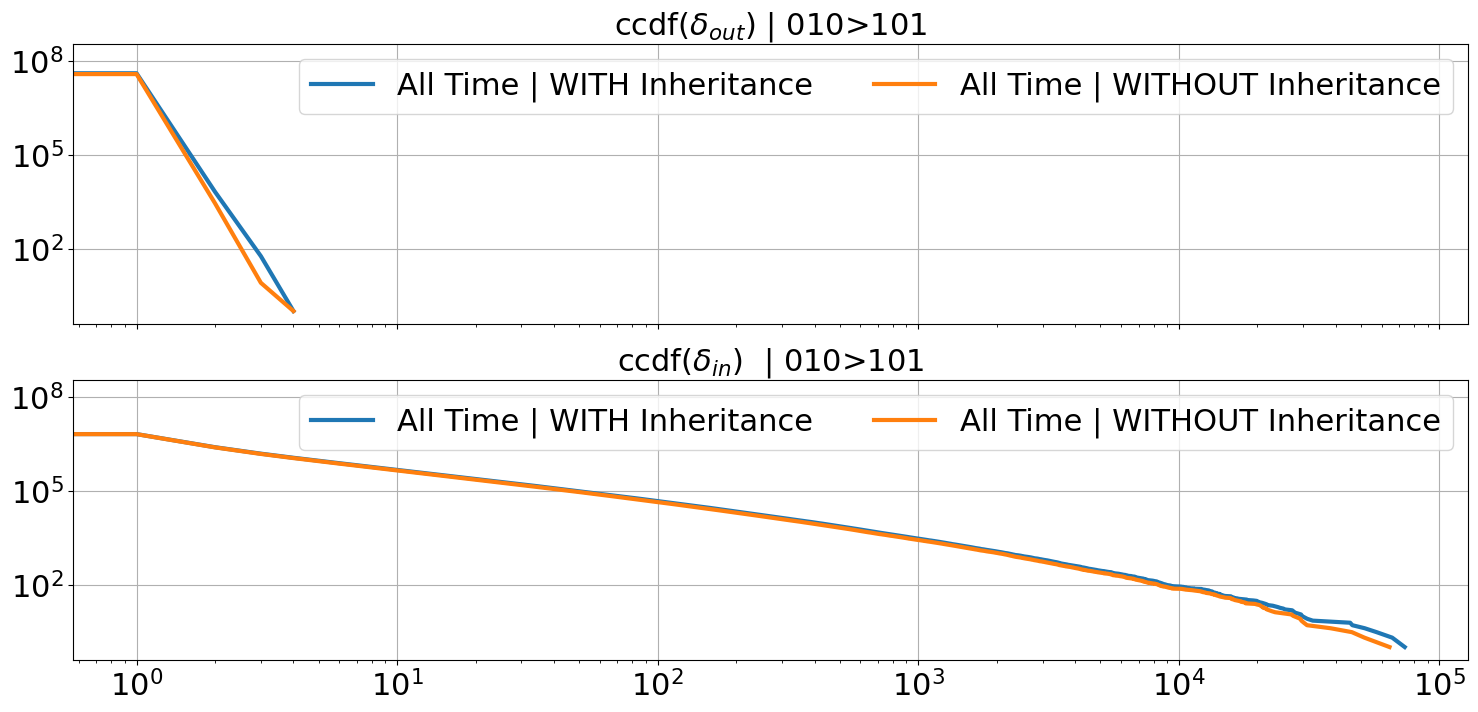

----------------------------------------------------------------------------------------------------------------------------------------------------------------


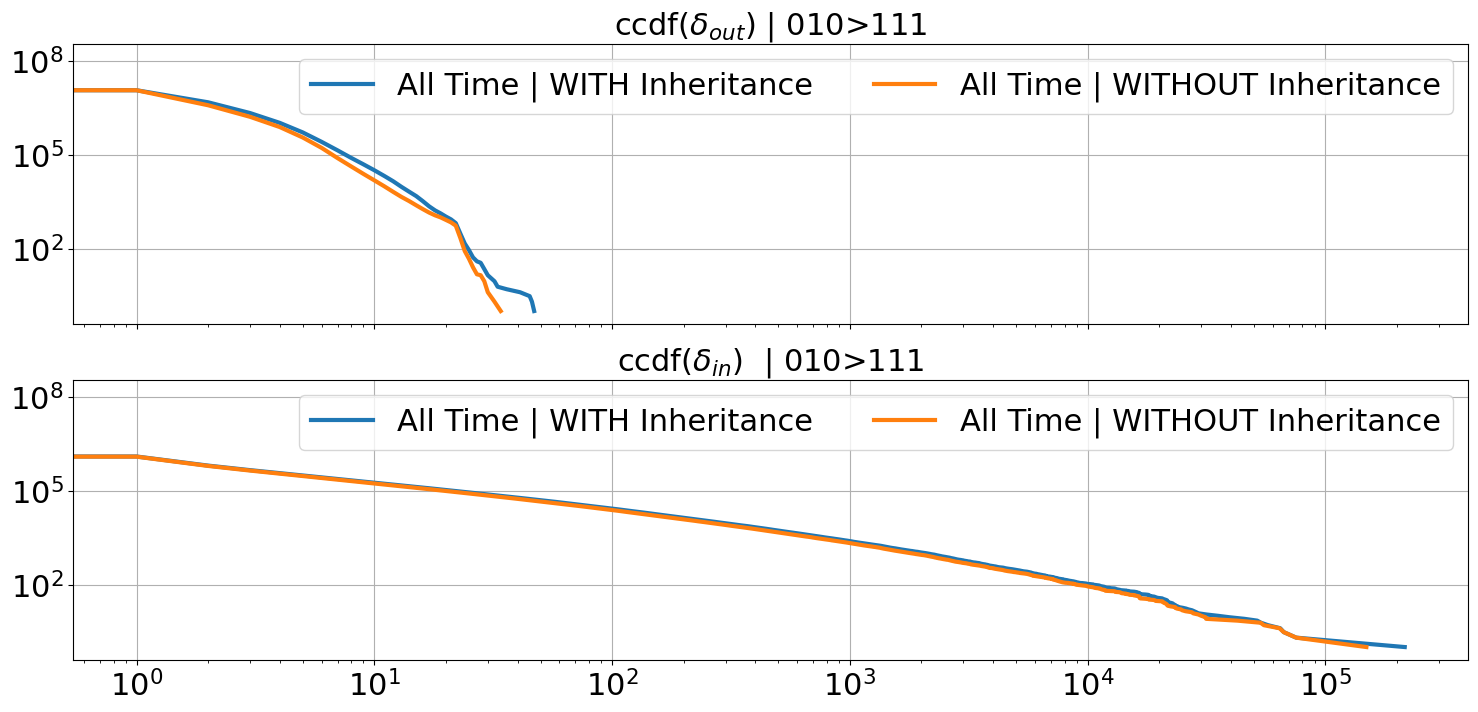

----------------------------------------------------------------------------------------------------------------------------------------------------------------


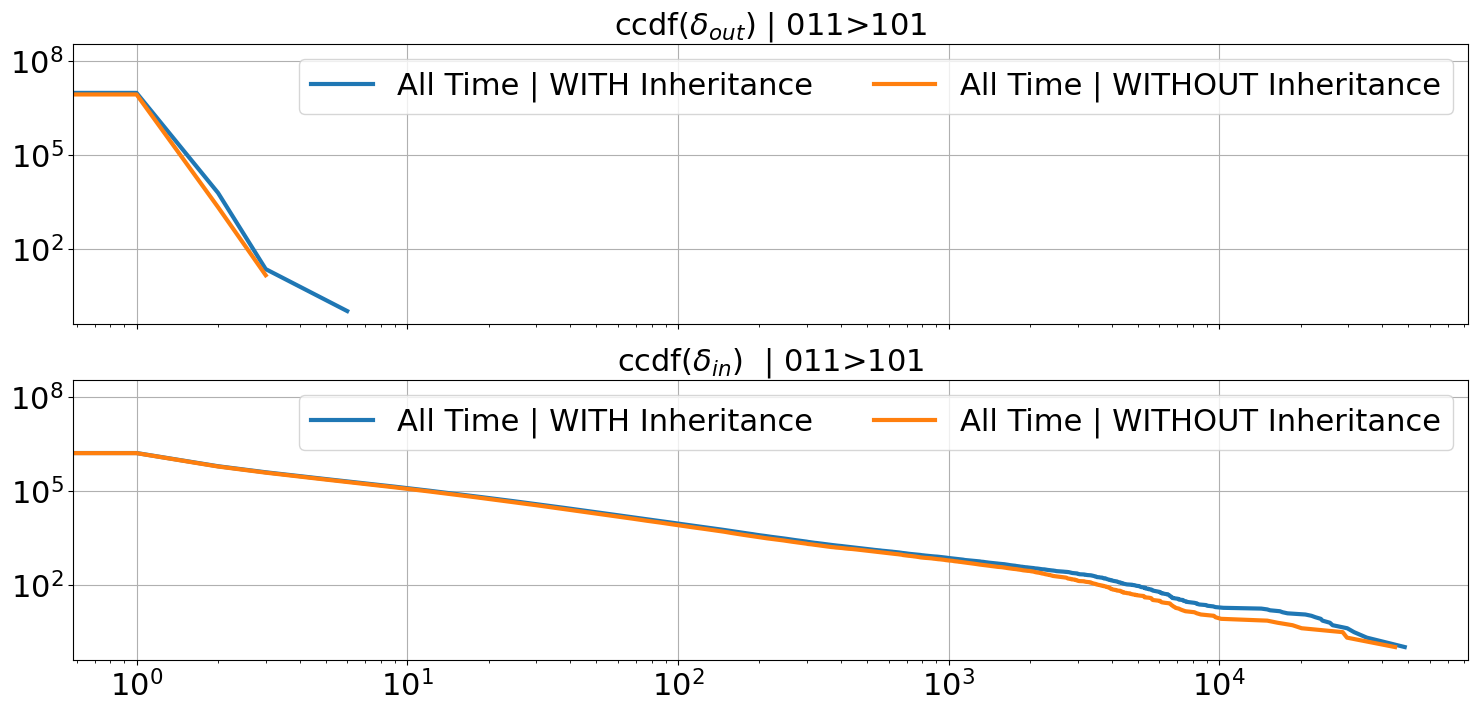

----------------------------------------------------------------------------------------------------------------------------------------------------------------


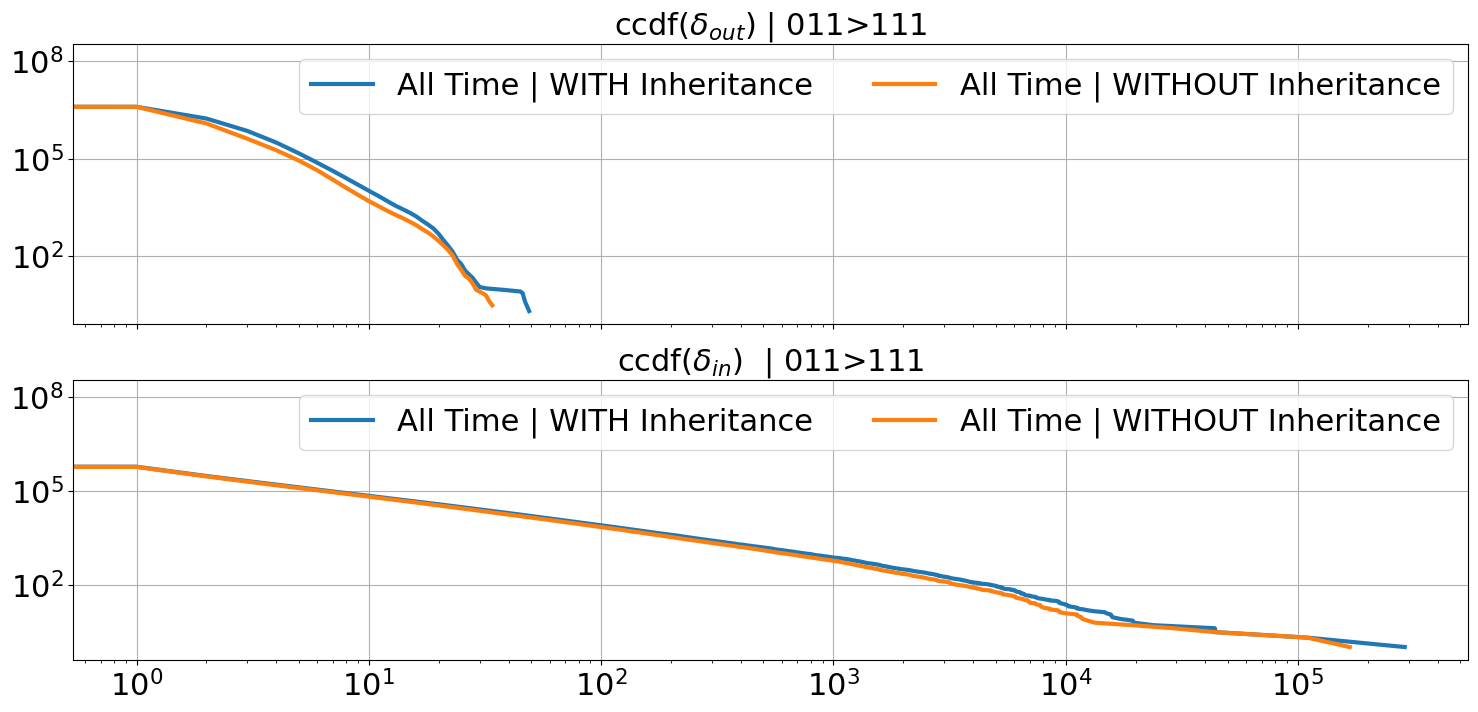

----------------------------------------------------------------------------------------------------------------------------------------------------------------


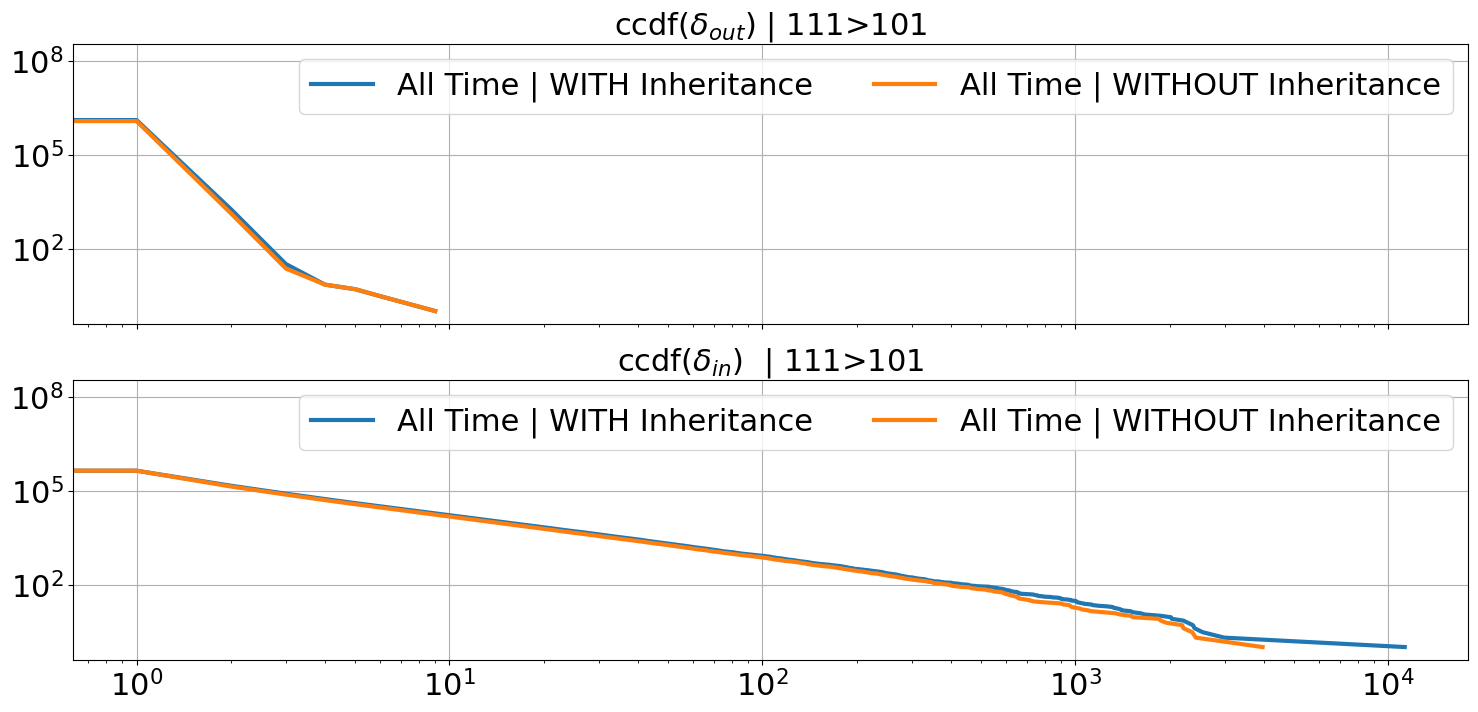

----------------------------------------------------------------------------------------------------------------------------------------------------------------


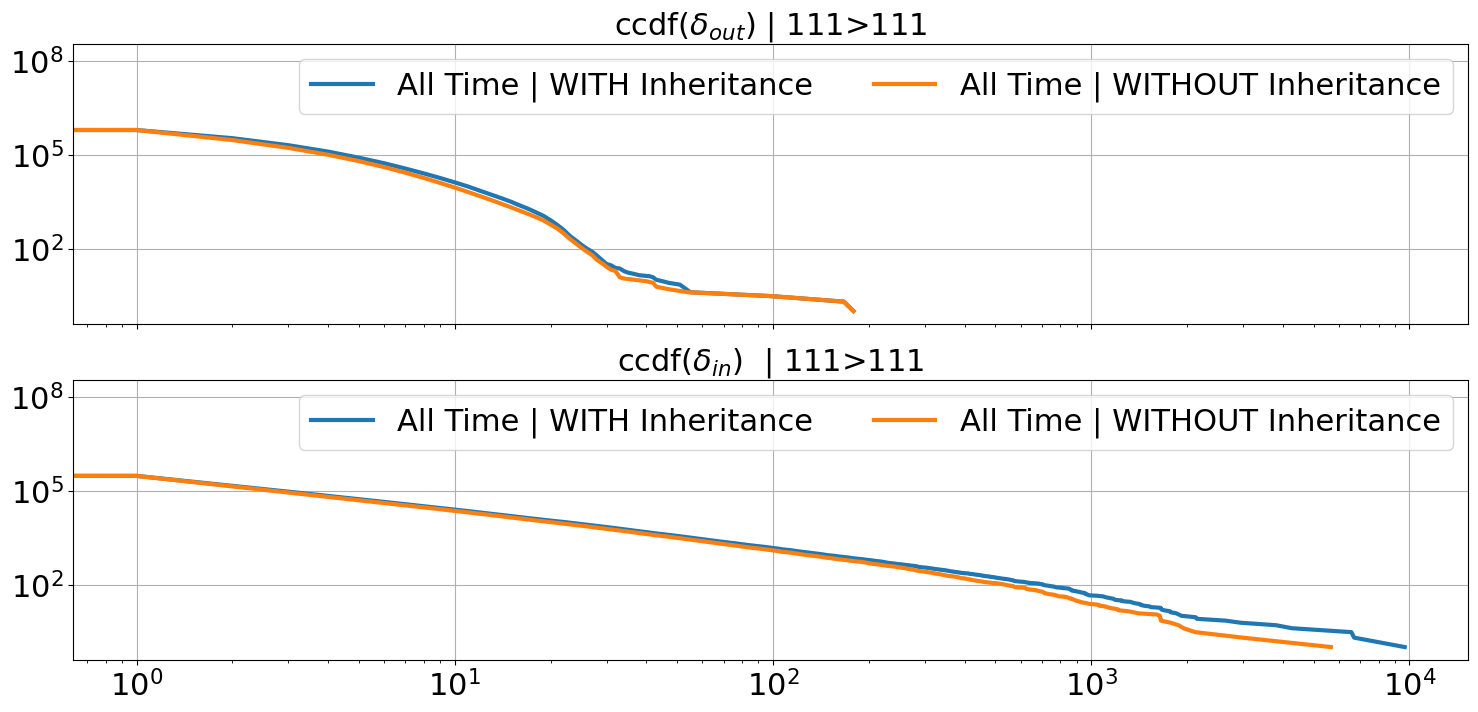

In [12]:
if DisplayStat:
    #for InheritancePath,label in [("BigO","WITH Inheritance"),("L0","WITHOUT Inheritance")]:
    dout={}
    din={}
    for InheritancePath,label in [("BigO","WITH Inheritance"),("L0","WITHOUT Inheritance")]:
        
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_20241008.pkl"
        dout[InheritancePath],din[InheritancePath]=pickle.load(open(filename,"rb"))
        print("LOAD ",filename)
        print("dout.keys()",dout[InheritancePath].keys())
        print("din.keys() ",din[InheritancePath].keys())
    nfig=2
    fontsize=FontSize[nfig]-10
    
    # ccdf or df
    if True:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('y',"df")
    
    
    YearList=[3000]
    ColorList=["tab:green","tab:orange","tab:red","tab:blue","k"]
    for s in dout["BigO"].keys():
    #for s in ["O>O"]:
        # ONLY FOCUS on "O>O", others are the same
        print("-"*160)
        #print(s)
        fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex='col')   
        #plt.tight_layout()
        for i in [0,1]:
                axs[i].grid()
                axs[i].set_yscale("log")
                axs[i].set_xscale("log")
                axs[i].tick_params(axis='both',which='major',labelsize=fontsize)
            
        for InheritancePath,label,j in [
            ("BigO","WITH Inheritance",0),
            ("L0","WITHOUT Inheritance",1)
        ]:
            for kmonth in dout[InheritancePath][s].keys(): # ! month
                if kmonth%12==0: 
                    year=kmonth//12
                    if year in YearList:
                        c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                        labeltmp=str(year)+" "
                        if year ==3000:
                            labeltmp="All Time | "
                        axs[0].plot(dout[InheritancePath][s][kmonth]["x"],dout[InheritancePath][s][kmonth][key],markersize=0.5,lw=3,label=labeltmp+label)
                        axs[1].plot(din[InheritancePath][s][kmonth]["x"],din[InheritancePath][s][kmonth][key],markersize=0.5,lw=3,label=labeltmp+label)
                    else:
                        pass
                        #axs[0,j].plot(dout[InheritancePath][s][kmonth]["x"],dout[InheritancePath][s][kmonth][key],markersize=0.5,c="k",alpha=0.8)
                        #axs[1,j].plot(din[InheritancePath][s][kmonth]["x"],din[InheritancePath][s][kmonth][key],markersize=0.5,c="k",alpha=0.8)
            axs[1].set_title(field+r'$(\delta_{in})$  | '+s,fontsize=fontsize)
            axs[0].set_title(field+r'$(\delta_{out})$ | '+s,fontsize=fontsize)
            axs[0].legend(loc='upper right',fontsize=fontsize,ncol=2,markerscale=2)
            axs[1].legend(loc='upper right',fontsize=fontsize,ncol=2,markerscale=2)
        plt.show()

- In the context of $TSL$ partitioning as with the topological partitioning of the $RV-RV$ subnetwork, this approach highlights distinct structural characteristics. For example, among the distributions of outgoing degrees, only those corresponding to edges pointing to nodes of type $111$ (with or without inheritance) exhibit a maximum that increases year after year.

- For incoming degree distributions, the $TSL$ partitioning reinforces the observation previously made without partitioning: the distributions remain remarkably regular across all degree values, not just for the highest ones. This should, however, be nuanced in light of the lower observed maxima and the biases discussed in the article—particularly the fact that temporal partitioning relies on a property (the size of the origins near the export date) whose distribution already displays non-trivial characteristics.
    
- Comparing the cases with and without inheritance, a visual inspection of the degree distributions reveals no substantial change in their overall shape. As expected, the impact of inheritance is more pronounced for higher degree values. As shown below, this effect appears to extend across all degree values, for both incoming and outgoing edges—for instance, in the case of $011>111$ edges.



## e) Transient Regime Discussion

The global degree distribution of the derived graph $O-(RV/RL)-O$ is dominated by the degrees corresponding to `011>(101,111)` edges (see above). These also represent the highest degree values in the global $O-(RV/RL)-O$ degree distribution.

Let us recall that:

- We have chosen not to account for the temporal evolution of node types, instead retaining their last known type.

- The selected temporal partitioning is biased, as it is based on a non-trivial distribution of origin sizes. By favoring the largest known origin "at any given time," we limit the potential effect of aging on the attractiveness of nodes.

- Anomalies exist in the data at the end of 2017 and the beginning of 2018, as well as in the months preceding the export date of this dataset. These anomalies likely induce a deficit in incoming "degrees".

- The analysis of the graph's evolution rules unambiguously highlights at least one major change starting in 2005-2008 with the emergence of `011` and `111` node types. These are linked to the real-world system, as they can explicitly be associated with the beginning of the use of distributed source code management tools, particularly $git$. Meanwhile, `101` node types existed prior to this period, albeit in smaller numbers compared to `001` nodes, which can be seen as reservoirs for future `101` or `111` nodes.

- The method used to infer the scalin factor assumes from the outset the existence of a scale invariant regime (specifically, a power-law law for large degree value). Nevertheless, applying this method reveals (SM10, article Fig. 4, and discussion about the sensibility to the distance used to select $x_c^{min}$) a rapid variation in the measured exponent, which quickly increase from approximately $\sim 2.1$ to about $2.4$ within a year. This is followed by a possible period until $2014/2015$ where the estimated exponent stabilizes around $2.4$, before decreasing.

The question here is to discuss whether the $TSL$ partitioning modifies or refines this analysis, using the method proposed by Clauset et al. as a probe to study the temporal evolution of the indegree distribution (and not to conclude on the existence of a scale-invariant regime).


### Scaling factor overtime

--------------------------------------------------------------------------------
['011>111', '011>101']
--------------------------------------------------------------------------------
WITH Inheritance
--------------------------------------------------------------------------------
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20241008.pkl
dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111']) dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


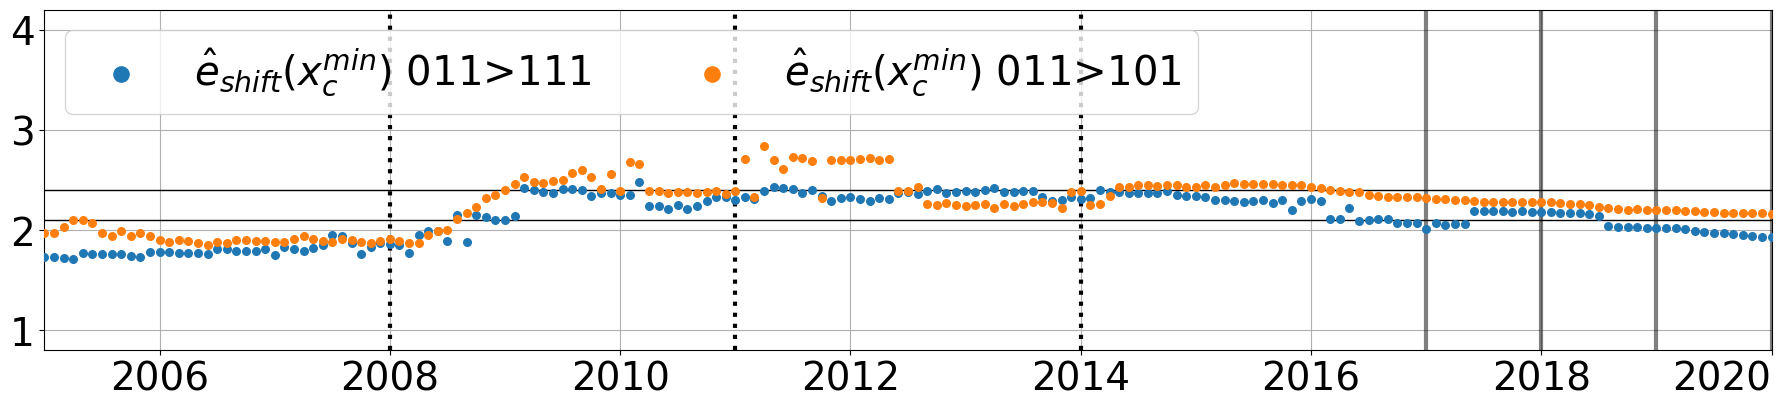

WITHOUT Inheritance
--------------------------------------------------------------------------------
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_L0_TSL_Month_1980_2025_20241008.pkl
dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111']) dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


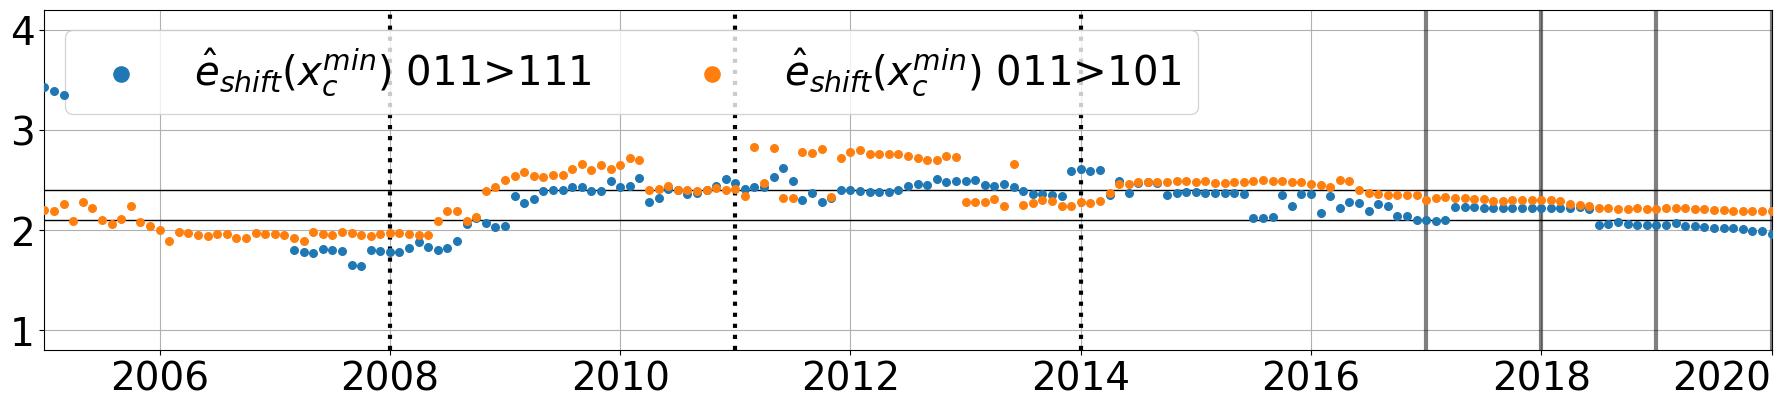

--------------------------------------------------------------------------------
['111>111', '111>101']
--------------------------------------------------------------------------------
WITH Inheritance
--------------------------------------------------------------------------------
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20241008.pkl
dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111']) dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


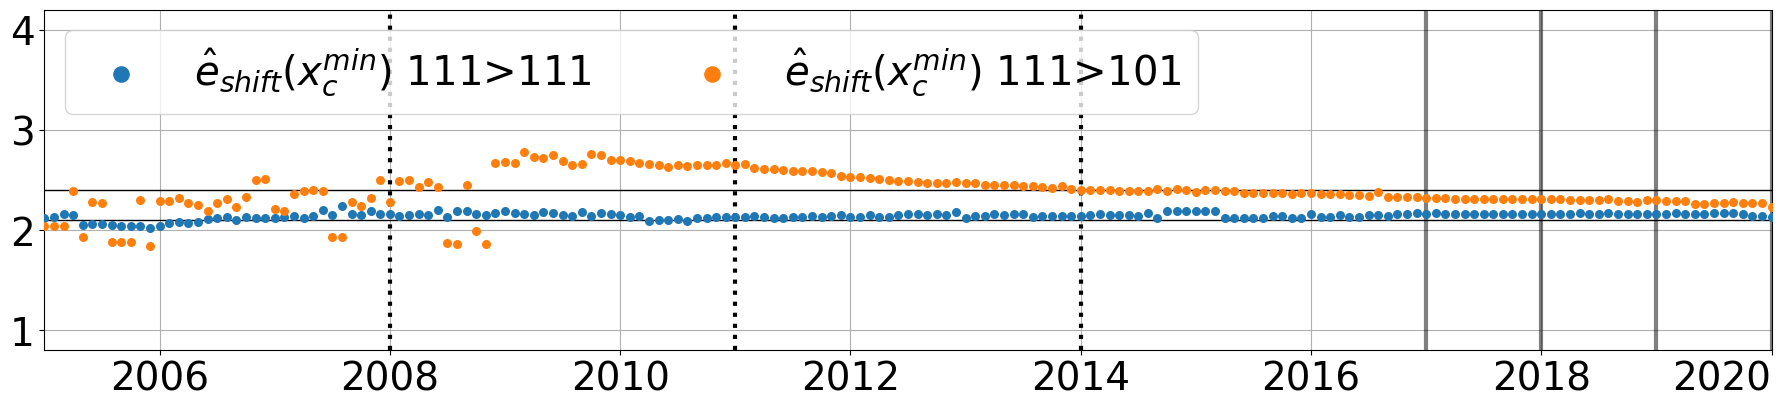

WITHOUT Inheritance
--------------------------------------------------------------------------------
LOAD  ./ExportData/degreeInOutHisto_TT_O-O_L0_TSL_Month_1980_2025_20241008.pkl
dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111']) dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


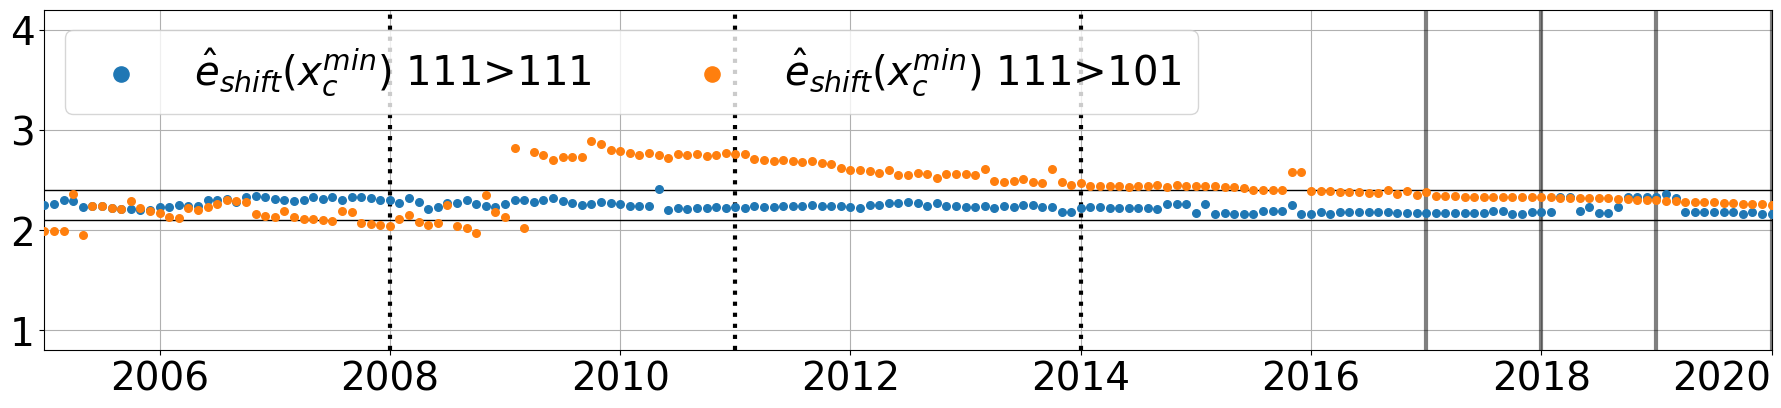

In [24]:
DisplayStat=True
# we keep the same parameter without discussing here the influence of those parameters
WKS="weightedKS" 
XCmin=6

if DisplayStat:
    def verticalline(fig,axs):
        alpha=0.5
        lw=3
        for year in [2017,2018,2019,2020,2021]:
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axs.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
                        
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')
    for edgeTypeList in [["011>111","011>101"],["111>111","111>101"]]:
        print(80*"-")
        print(edgeTypeList)
        print(80*"-")
        for InheritancePath,label in [("BigO","WITH Inheritance"),("L0","WITHOUT Inheritance")]:
            print(label)
            print(80*'-')
            filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_20241008.pkl"
            dout,din=pickle.load(open(filename,"rb"))
            print("LOAD ",filename)
            print(dout.keys(),din.keys())
    
                                
            xdate={}
            x_min={}
            e_x_min={}
            D_max={}
            Nnodes={}
            Nedges={}
            for edgetype in edgeTypeList:
                xdate[edgetype]=[]
                x_min[edgetype]=[]
                e_x_min[edgetype]=[]
                D_max[edgetype]=[]
                Nnodes[edgetype]=[]
                Nedges[edgetype]=[]
                for year in range(1980,2022,1):
                    for month in range(0,12):
                        try:
                            x=din[edgetype][year*12+month]["x"]
                            y=din[edgetype][year*12+month]["y"]
                            yc=din[edgetype][year*12+month]["ccdf"]
                            #plt.scatter(x,y,label=str(year))
                            yfit,xfit,imin,x_min_shift,e_x_min_shift,D_max_shift=Get_yfit_yc_y_x(x,y,yc,Fall=True,WKS=WKS,XCmin=XCmin)
                            #print(imin,x_min_shift[imin],D_max_shift[imin])
                            #print("max",np.max(x),x[-3:],y[-3:])
                            #print("D_max",D_max_shift)
                            #print("x_fit",x_min_shift)
                            xdate[edgetype].append(year+(month-1)/12)
                            x_min[edgetype].append(x_min_shift[imin])
                            e_x_min[edgetype].append(e_x_min_shift[imin])
                            D_max[edgetype].append(D_max_shift[imin])
                            Nnodes[edgetype].append(y)
                            Nedges[edgetype].append(x*y)
                        except:
                            #print("missing",year,month,edgetype,edgetype in din)
                            pass
            # focusing on the estimate of the scaling factor
            nfig=1
            fontsize=28
                    
            fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
            plt.tight_layout()
            axs.set_xlim(2005,2020)
            axs.grid()
            for edgetype in edgeTypeList:
                axs.scatter(xdate[edgetype],e_x_min[edgetype],s=30,zorder=10,label=r'$\hat{e}_{shift}(x_c^{min})$ '+edgetype)
            axs.legend(loc='best',fontsize=fontsize+1,ncol=2,markerscale=2)
            axs.set_ylim(0.8,4.2)
            axs.tick_params(axis='both',which='major',labelsize=fontsize)
            axs.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=1)
            axs.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=1)
        
            verticalline(fig,axs)
                    
            plt.show()
          

### In-degree distribution in 2008, 2011, and 2022 

To discuss the existence of the gap in the estimate of the scaling factor

yearlist [2008, 2011]
--------------------------------------------------------------------------------
InheritancePath BigO edge case 011>111 | year 2008 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


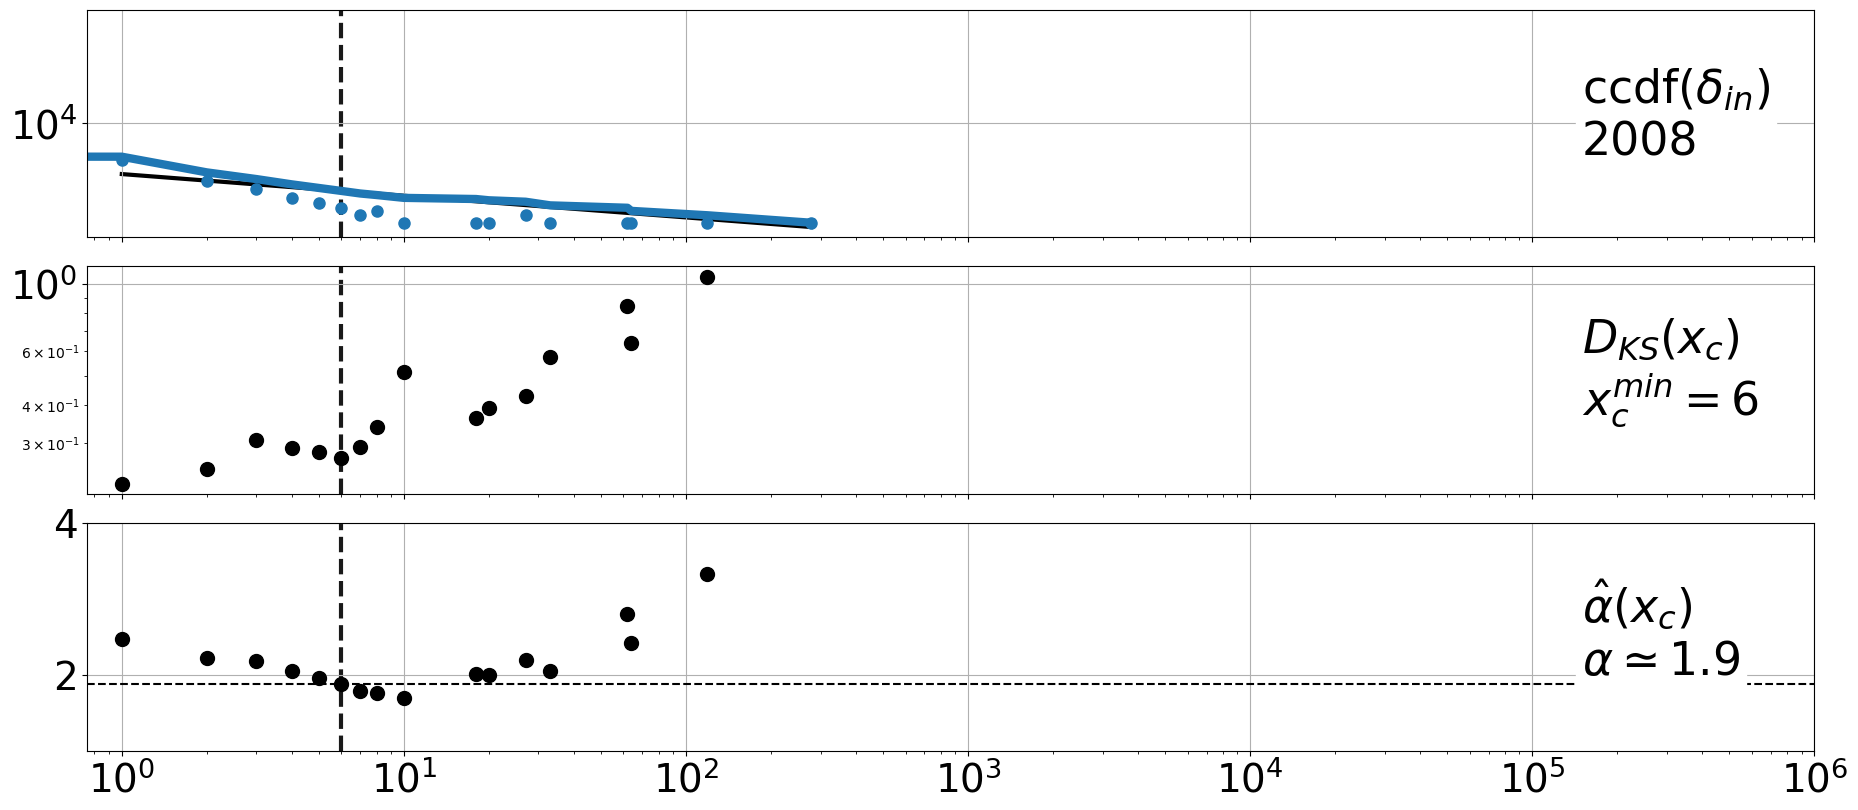

--------------------------------------------------------------------------------
InheritancePath BigO edge case 011>111 | year 2011 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


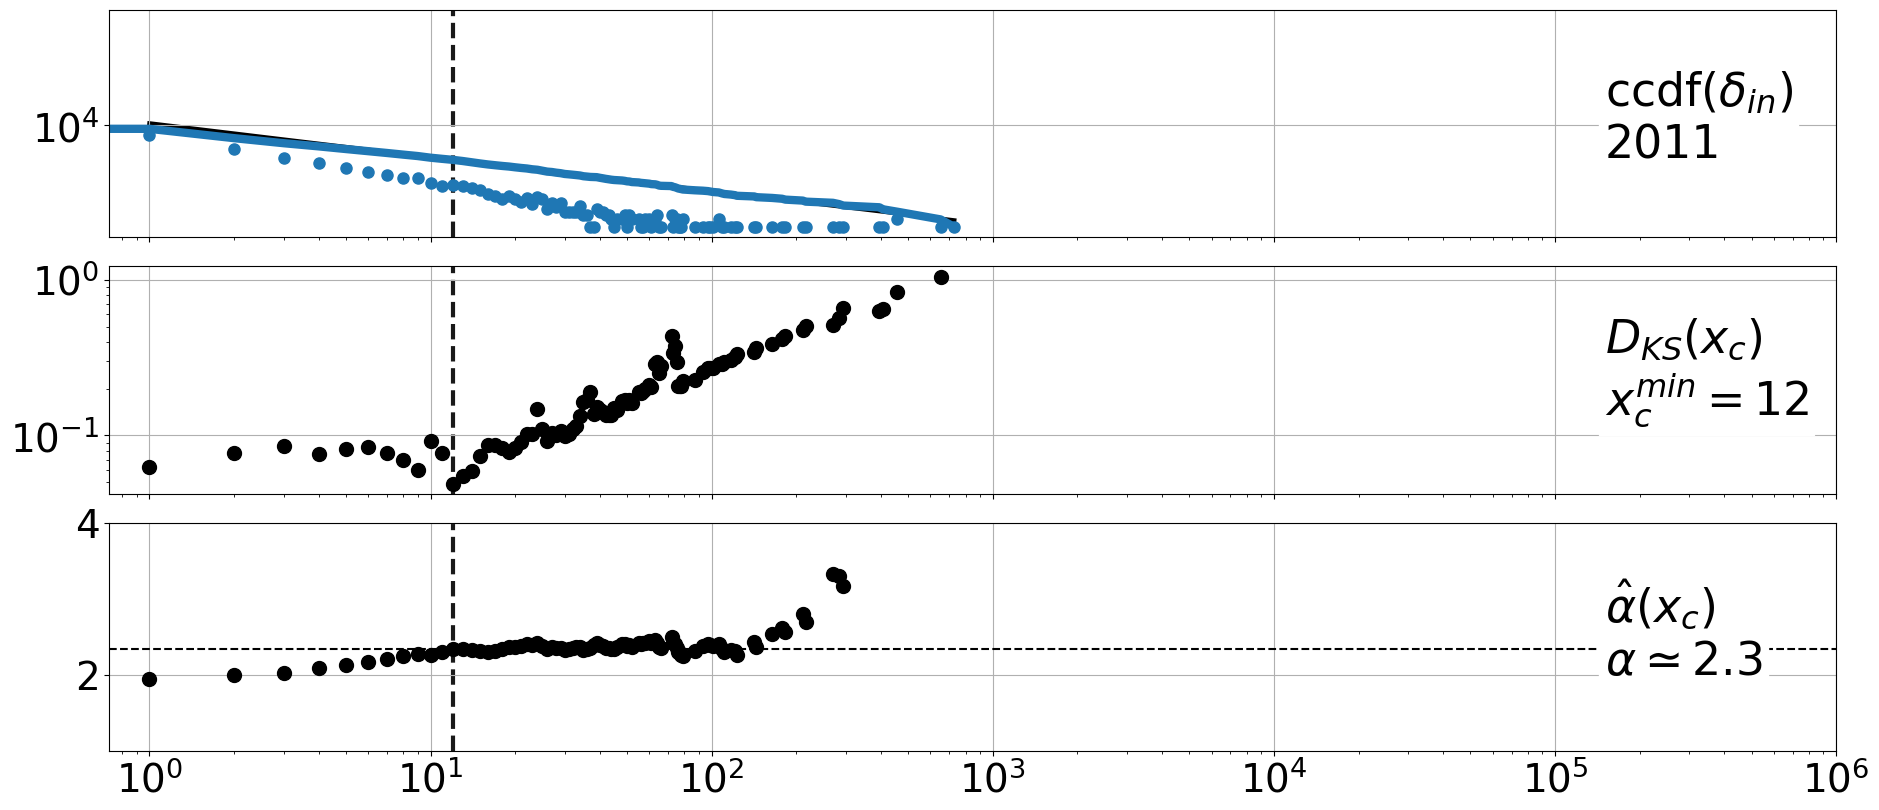

--------------------------------------------------------------------------------
InheritancePath BigO edge case 111>111 | year 2008 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


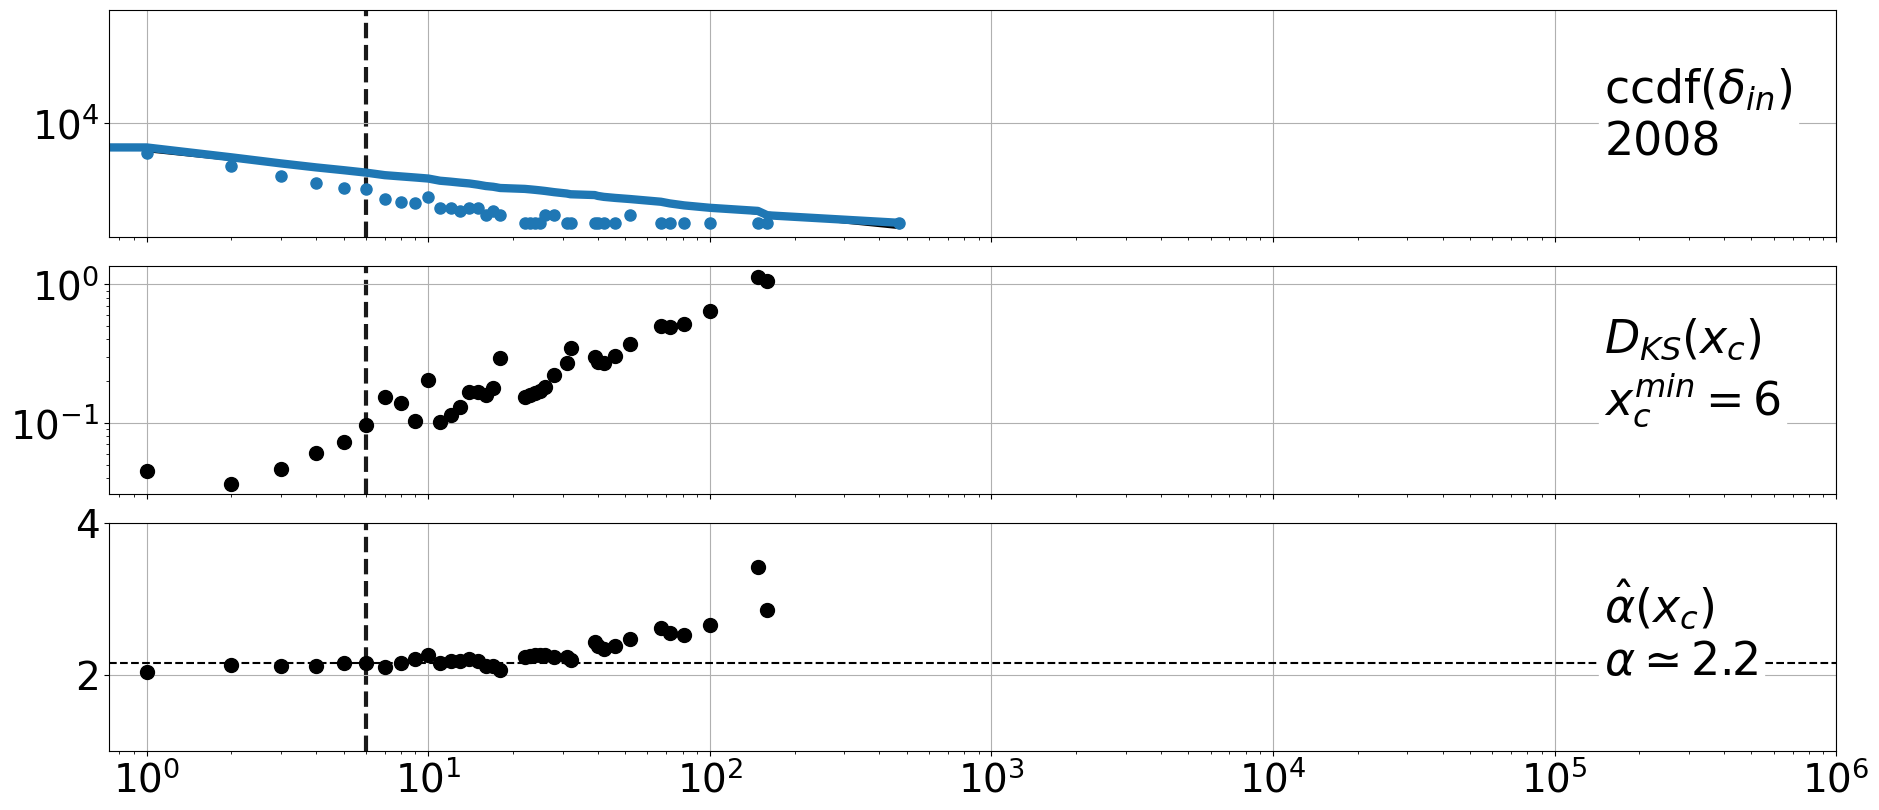

--------------------------------------------------------------------------------
InheritancePath BigO edge case 111>111 | year 2011 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


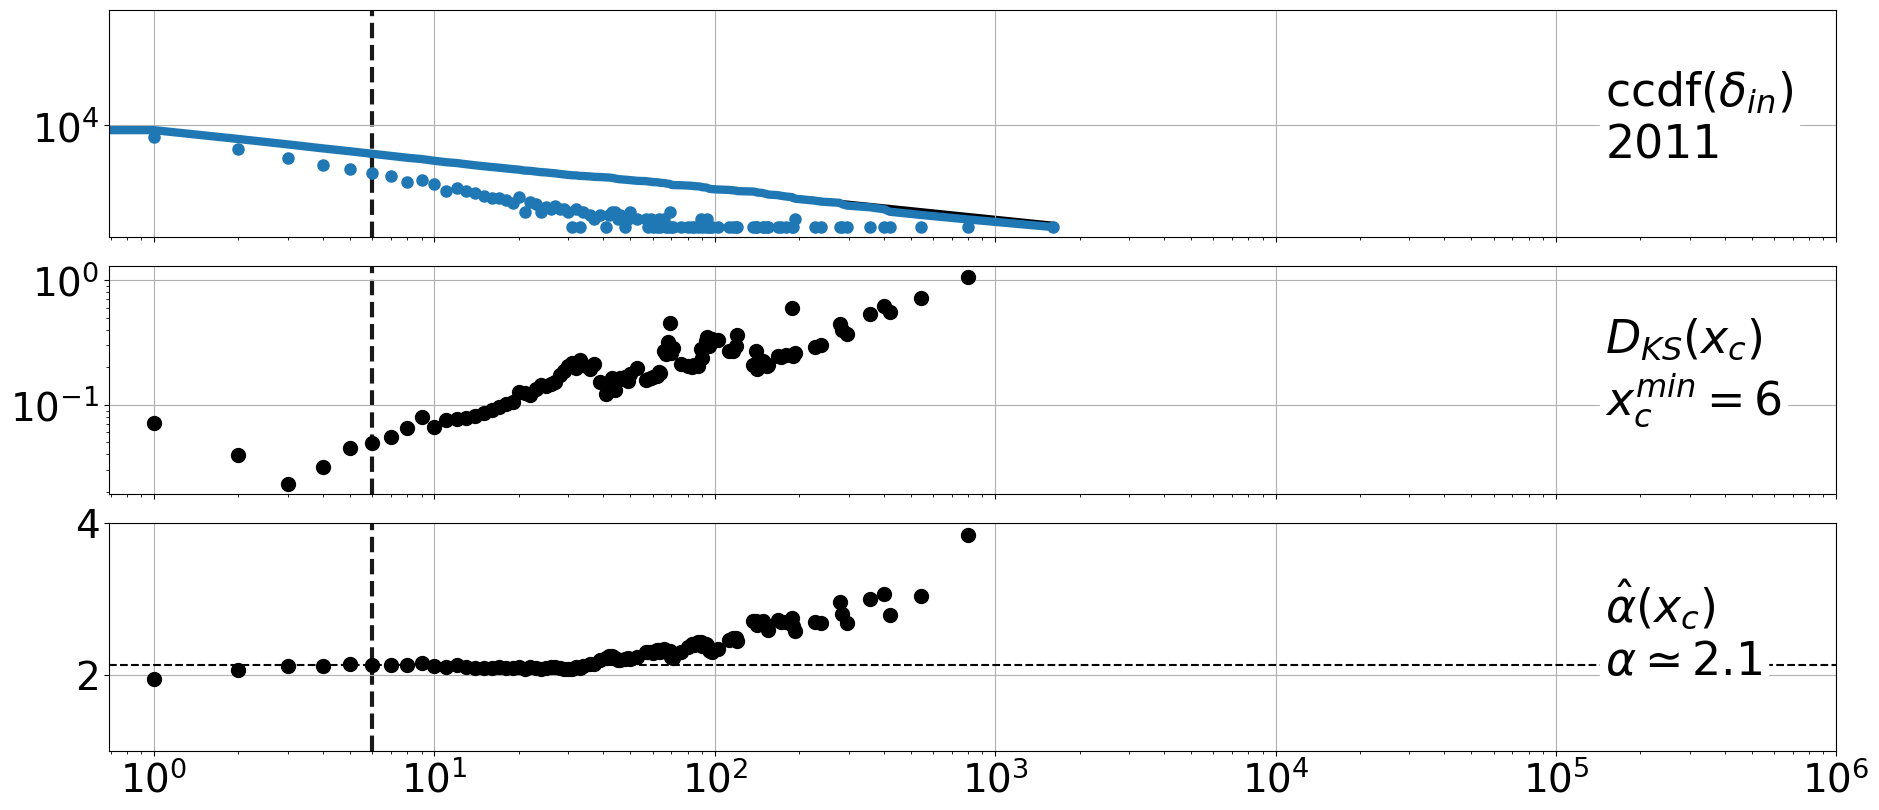

--------------------------------------------------------------------------------
InheritancePath L0 edge case 011>111 | year 2008 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


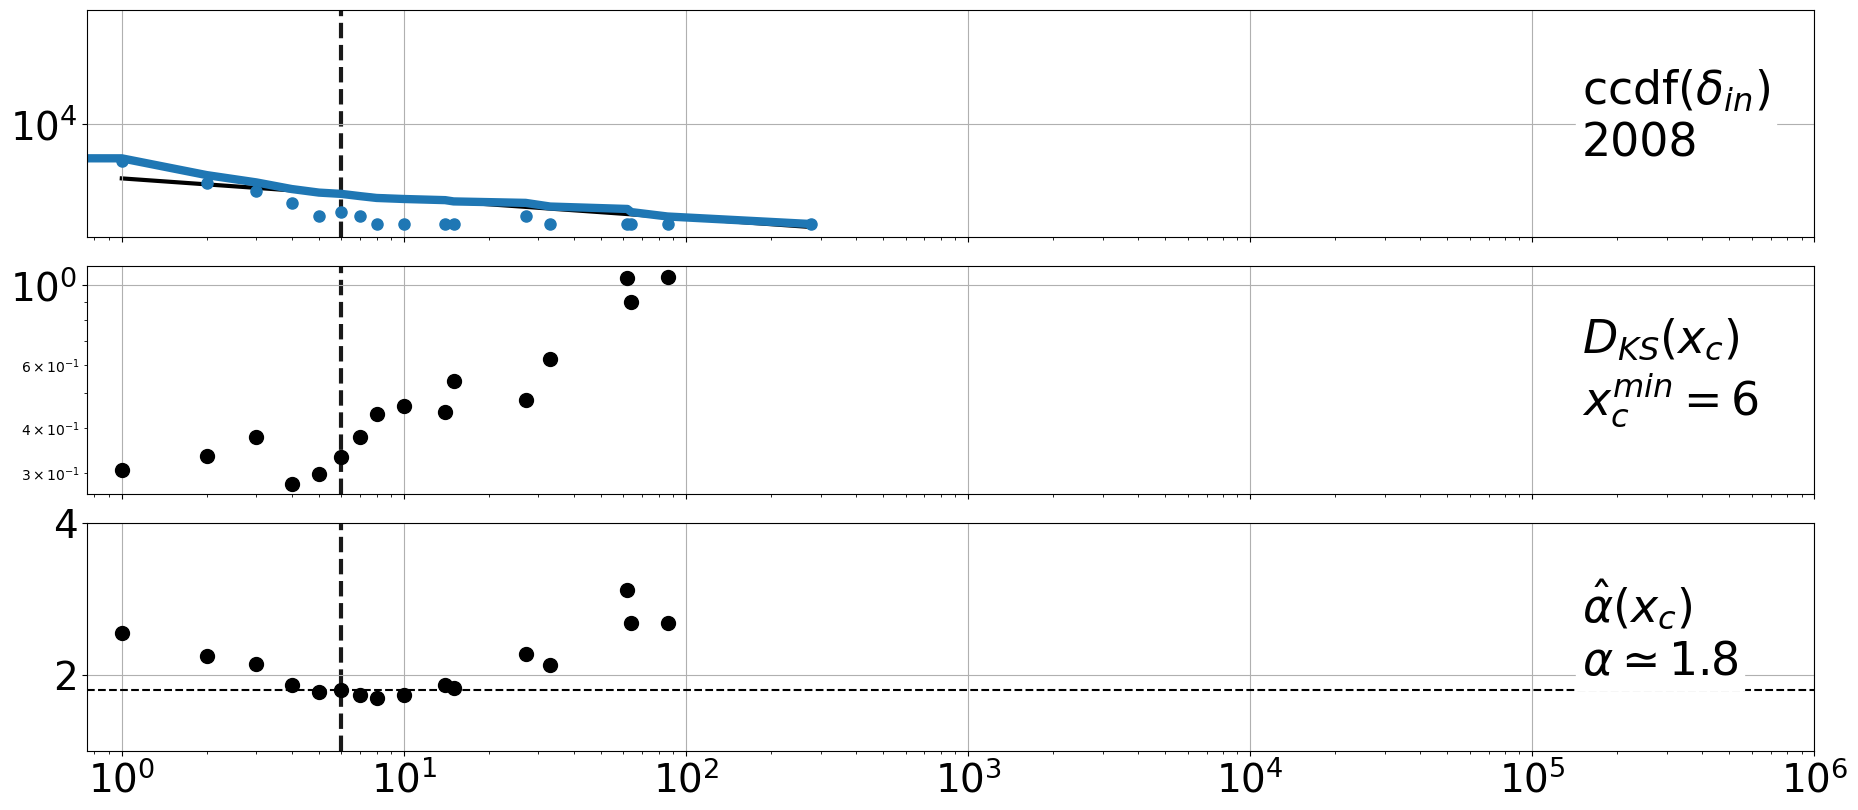

--------------------------------------------------------------------------------
InheritancePath L0 edge case 011>111 | year 2011 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


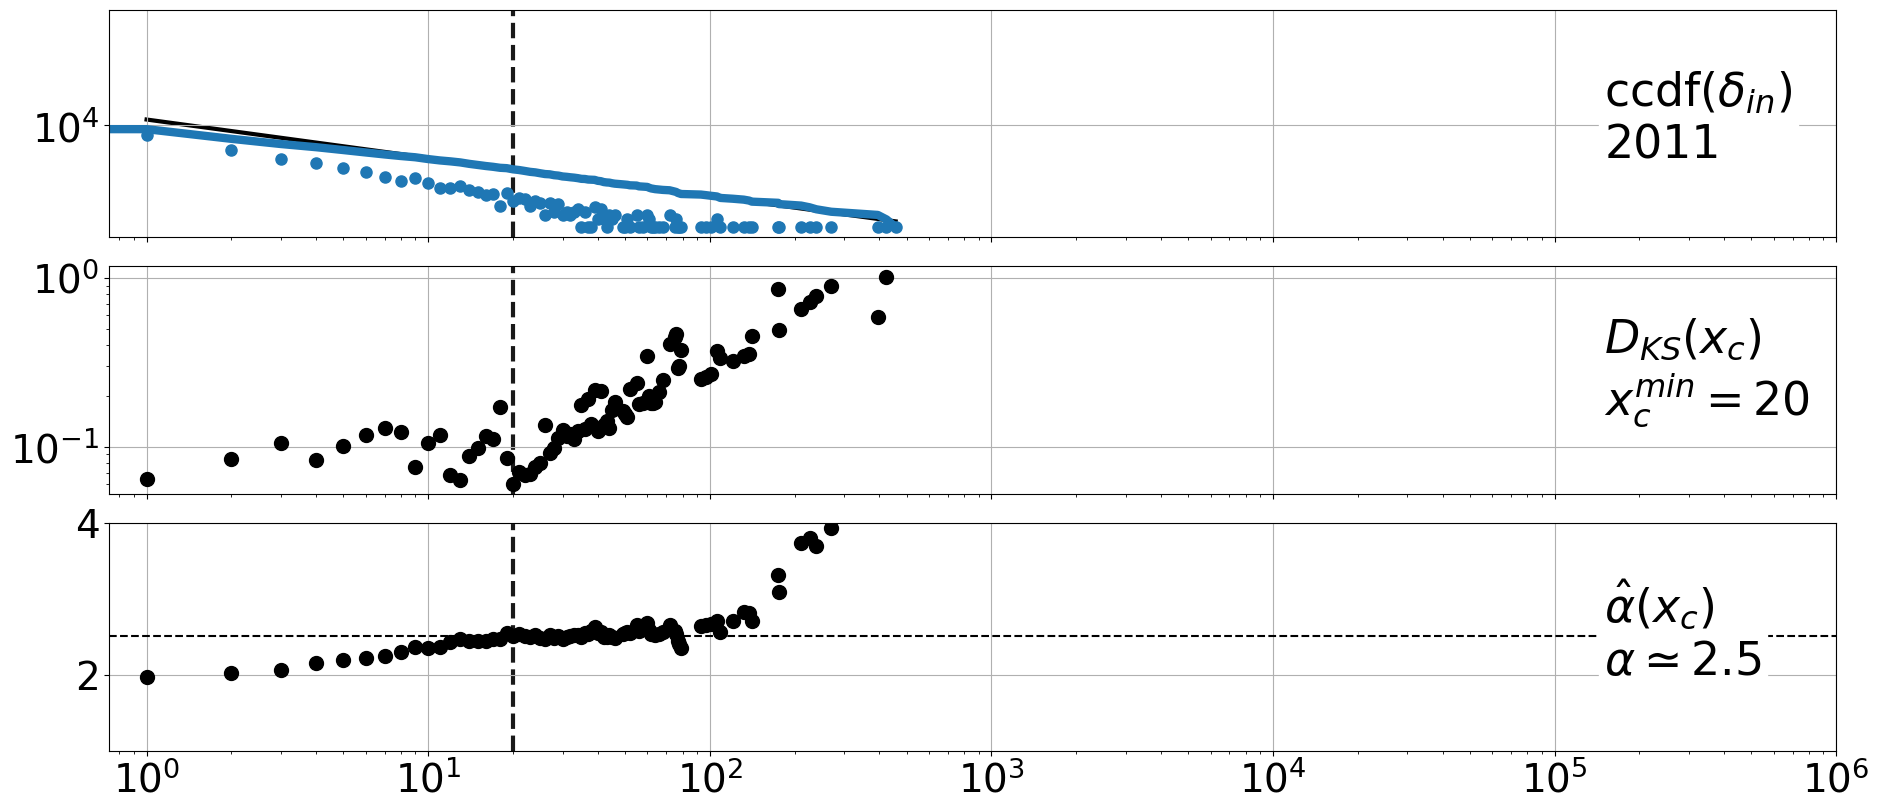

--------------------------------------------------------------------------------
InheritancePath L0 edge case 111>111 | year 2008 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


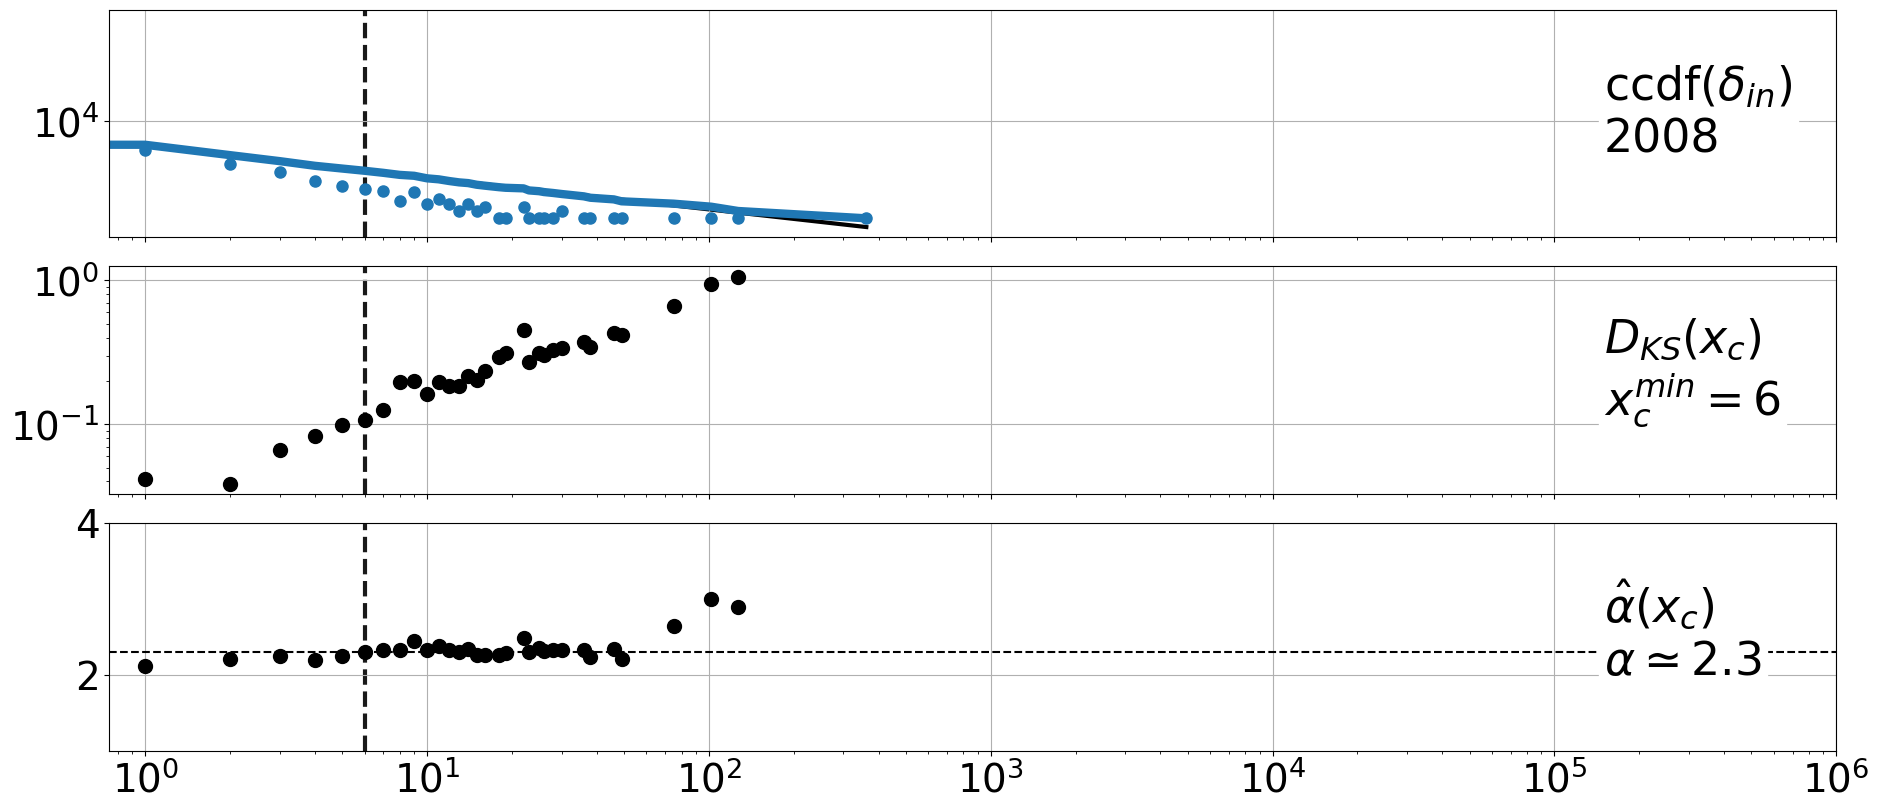

--------------------------------------------------------------------------------
InheritancePath L0 edge case 111>111 | year 2011 | WKS weightedKS | XCmin 6 | RemoveSelfLoop True


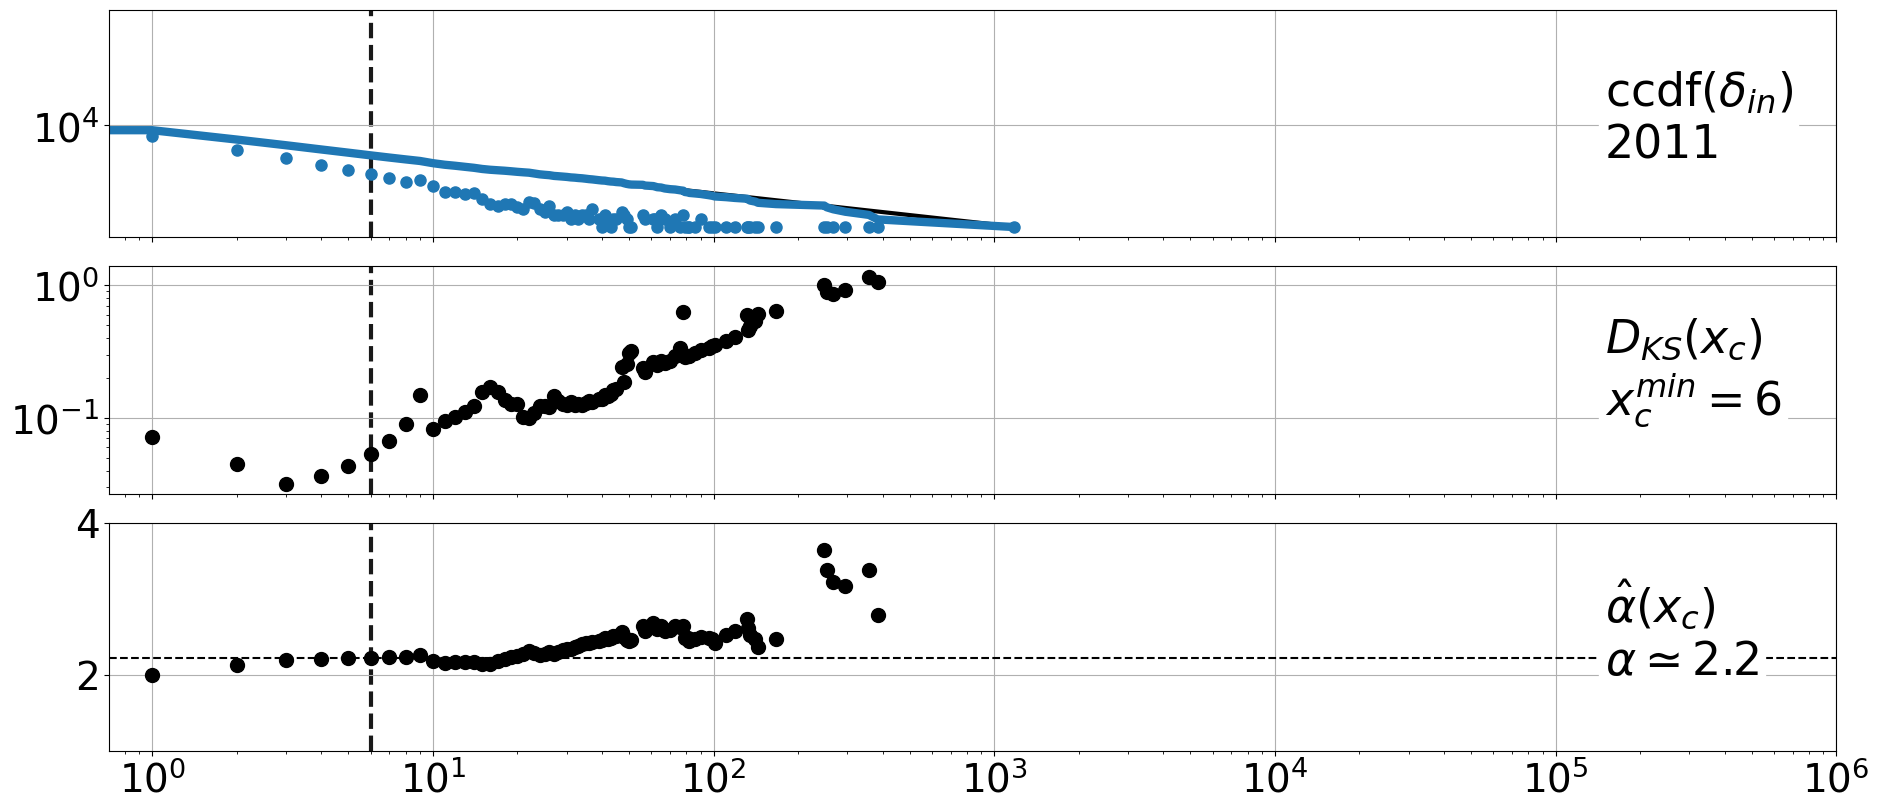

In [172]:
WKS="weightedKS" # KS, weightedKS, Kuiper, shiftedKS
XCmin=6
DisplayStat=True
RemoveSelfLoop=True
yearlist=[2008,2011]
print("yearlist",yearlist)
if DisplayStat:
    for InheritancePath in ["BigO","L0"]:
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_20241008.pkl"
        for case in ["011>111","111>111"]:

            dout,din=pickle.load(open(filename,"rb"))
            for year in yearlist:
                print("-"*80)
                print("InheritancePath",InheritancePath,"edge case",case,"| year",year,"| WKS",WKS,"| XCmin",XCmin,"| RemoveSelfLoop",RemoveSelfLoop)
                x=din[case][year*12]["x"]
                y=din[case][year*12]["y"]
                ccdf=din[case][year*12]["ccdf"]
                if RemoveSelfLoop and case=="O>O":
                    # remove selfloop
                    #print(x[:10],x[-10:])
                    #print(y[:10],y[-10:])
                    #print("Before",np.sum(x*y))
                    x=x[2:]-1 # shift x=0 and -1 for selfloop
                    y=y[2:]
                    #print("After",np.sum(x*y))
                    #print(x[:10],x[-10:])
                    #print(y[:10],y[-10:])
                    ccdf=np.cumsum(y[::-1])[::-1]
                    #print(ccdf[0],ccdf[-1])

                Plot_Figure_Degree(x,y,ccdf,year=year,filename="NONE",height=4,WKS=WKS,XCmin=XCmin,yrangeAlpha=[1,4])



### Discussion 

- Whether with or without edge inheritance rule, the exponents estimated for the `011>111` and `011>101` in-degree distribution is coherent with the existence of a "*transition*" between two "regimes". This is more of a "*transient*" phenomenon, as the edges `011>(101,111)` only start to appear significantly from this point onward. The measured exponents seem significantly higher for the in-degree distributions `011>101`.  A slow decline is then observed, converging towards the same values as the global distribution, which is dominated by this type of edges over long timescales.

- The  $O-(RV/RL)-O$ in-degree distribution (see SM10) is quite similar to the `011>101` and `011>111` in-degree distribution.

- The `111>111` in-degree distribution does not exhibit large variation of $\hat{\alpha}$ between 2008 and 2011, and appears much more regular than the others.


Let us recall once again that we have used the method proposed by Clauset et al. as a probe to study the temporal evolution of the indegree distribution (and not to conclude on the existence of a scale-invariant regime).

The temporal and topological partitioning highlights distinct evolution rules, particularly by characterizing the later emergence of `111` and `011` node types and their associated edges. The subgraph restricted to `111` nodes and their associated edges `111>111` appears to be less sensitive to the transient phenomena observed between 2008 and 2011.

Given the limitations previously discussed—such as the non-incremental temporal partitioning and the presence of anomalies in the dataset starting from 2018, for this dataset export dated 2021—we leave the continuation of this detailed analysis for future work, leveraging one or more more recent datasets.

Nonetheless, the following sections highlight some intrinsic features of the subgraph formed by `111` nodes, making it worth studying on its own, beyond the specific dataset used in this analysis.


## f) SCC, WCC and Bow-tie Structure

The $(RL,RV)$ subgraph is a directed acyclic graph (DAG), due to the use of intrinsic identifiers for node identification in the raw dataset. In the main $(O,RL,RV)$ graph, the `O>RV` and `O>RL` edges are directed by default, although this is not strictly necessary, apart from the (a priori) representation as a multilayer directed graph.

The temporal partitioning process, which allows defining a temporal attribute for nodes of type `O`, first eliminates the natively directed subgraph (i.e., the `RV` and `RL` nodes) and then reintroduces directed edges between $O$ nodes after partitioning.

The direction of these $O-O$ edges comes from the partitioning process or alternatively the "*arrow of time*" derived from the temporal attributes assigned to the $O$ nodes.

If edges are created once and only towards nodes existing prior to the creation of a given node, it becomes impossible to observe the formation of cycles and, therefore, the emergence of strongly connected components (SCCs) in this directed graph.
                              
In contrast, the "*graph of the web*" is an example of a directed graph where a giant strongly connected component (SCC) can form. In such a graph, non-trivial distributions of both in-degrees and out-degrees are observed. As one might expect, this implies that some links appeared between certain *pages* after the creation of these pages.

The conditions under which this giant component emerges are a distinct topic in the study of the evolution of probabilistic networks (see for instance Albert et al 2001, Albert et al 2000).

Regarding the network studied here, mechanisms of aggregation between connected components have already been highlighted (Pietri et al., 2020).



Here, we simply present, for illustrative purposes and as an introduction to the following section, the results of the computation of strongly and weakly connected component size distributions in the `O–(RV/RL)–O` derived graph (with edge inheritance), considering both conventions for edge direction, defined either by the partitioning itself or by the arrow of time,


In [13]:
depth=1
nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO()
statsoutput=DisplayTypeStats(nodes,edges,d,depth=depth)
sourceedges=GetSourceEdge(nodes)
dt=nodesad[sourceedges].astype("int")-nodesad[edges].astype("int") # NB: conversion from uint32 to int before calculating the difference.
print(f'Directed with source node timestamp < edge node timestamp {np.sum(dt<0):>,}')
print(f'Directed with source node timestamp = edge node timestamp {np.sum(dt==0):>,}')
print(f'Directed with source node timestamp > edge node timestamp {np.sum(dt>0):>,}')
mask=sourceedges!=edges
print(f'self loop {len(sourceedges)-np.sum(mask):>,}')

Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
GetNodesTypesArray [Elapse time : 5.0 (s)]
___ 000   :      20,324,807 (14.57%)
___ 001   :      56,686,555 (40.63%)
___ 010   :      43,251,437 (31.0%)
___ 011   :      10,751,627 (7.71%)
___ 101   :       7,077,940 (5.07%)
___ 111   :       1,432,167 (1.03%)
____________________________________
___ Total :     139,524,533 (100.0%)

GetEdgesTypesArray [Elapse time : 10.0 (s)]
___ 010>101 :      40,575,330 (50.26%)
___ 010>111 :      20,758,012 (25.71%)
___ 011>101 :       9,563,353 (11.85%)
___ 011>111 :       6,990,240 (8.66%)
___ 111>101 :       1,292,161 (1.6%)
___ 111>111 :       1,554,917 (1.93%)
_______________


### Keeping edge direction corresponding to partionning policy

Calculating weakly and strongly connected components size distribution, using networkX library 


In [22]:
import networkx as nx
import pandas as pd

Nedges=np.sum(mask)
print("Excluding selfloop, Nedges=",Nedges)
EdgesArray=np.zeros((Nedges,2),dtype='int')
EdgesArray[:,0]=sourceedges[mask].astype('int')
EdgesArray[:,1]=edges[mask].astype('int')

# Adding edges to a digraph using networkX

df = pd.DataFrame(EdgesArray, columns=['source', 'target'])
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.DiGraph())
print("# Nodes=",len(G.nodes)," # Edges=",len(G.edges()))

Excluding selfloop, Nedges= 80734013
# Nodes= 62513171  # Edges= 80734013


#### Weakly connected components

In [23]:
ti=time.time()
weakly_connected_components = list(nx.weakly_connected_components(G))
tf=time.time()

In [24]:
print(f'Weakly Connected Components Elapse {np.round(tf-ti)} (s) ')
print(f'___ # of components {len(weakly_connected_components):,}')
print(f'___ Average size {np.round(len(G.nodes)/len(weakly_connected_components),2)} (nodes)')

Weakly Connected Components Elapse 92.0 (s) 
___ # of components 7,073,516
___ Average size 8.84 (nodes)


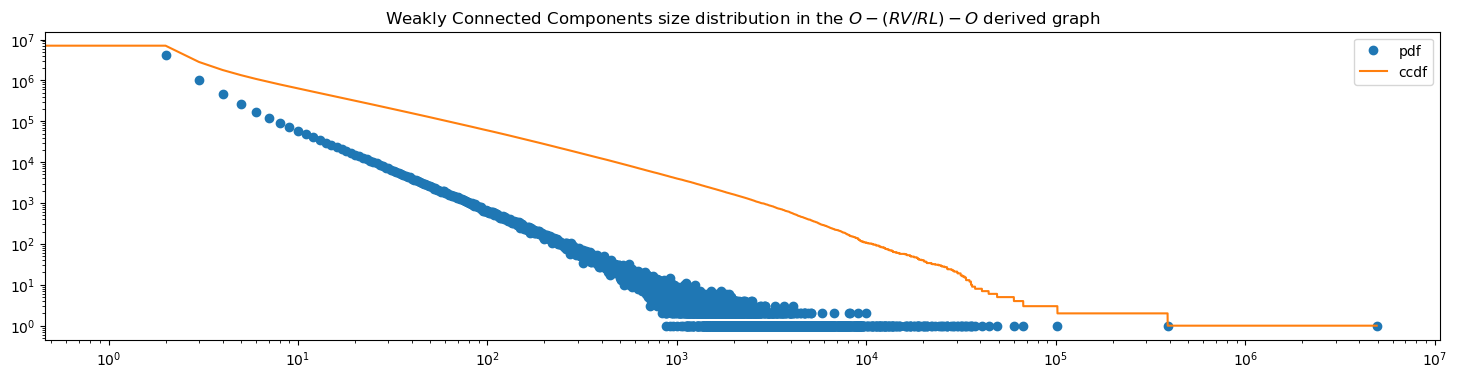

In [25]:
plt.figure(figsize=(18,4))
plt.title(r'Weakly Connected Components size distribution in the $O-(RV/RL)-O$ derived graph')
y=np.bincount([len(c) for c in weakly_connected_components])
x=np.arange(len(y))
plt.plot(x,y,"o",label="pdf")
plt.plot(x,np.cumsum(y[::-1])[::-1],label="ccdf")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

#### Strongly connected components

In [26]:
ti=time.time()
strongly_connected_components = list(nx.strongly_connected_components(G))
tf=time.time()

In [27]:
print(f'Strongly Connected Components Elapse {np.round(tf-ti)} (s) ')
print(f'___ # of components {len(strongly_connected_components):,}')
print(f'___ Average size {np.round(len(G.nodes)/len(strongly_connected_components),2)} (nodes)')

Strongly Connected Components Elapse 261.0 (s) 
___ # of components 62,513,171
___ Average size 1.0 (nodes)


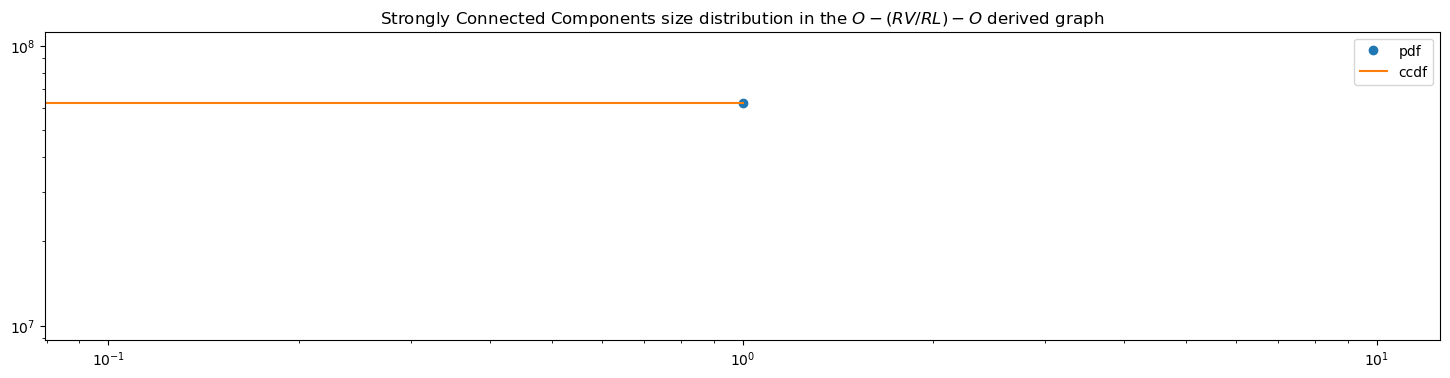

Strongly connected component size == 1 => No strongly connected components


In [28]:
plt.figure(figsize=(18,4))
plt.title(r'Strongly Connected Components size distribution in the $O-(RV/RL)-O$ derived graph')
y=np.bincount([len(c) for c in strongly_connected_components])
x=np.arange(len(y))
plt.plot(x,y,"o",label="pdf")
plt.plot(x,np.cumsum(y[::-1])[::-1],label="ccdf")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()
print("Strongly connected component size == 1 => No strongly connected components")

---

### Setting edge direction according to time arrow

Calculating weakly and strongly connected components size distribution, using networkX library 



In [30]:
import networkx as nx
import pandas as pd
# Création d'un graphe dirigé

soureedges=GetSourceEdge(nodes)
mask=soureedges!=edges
Nedges=np.sum(mask)
print("Excluding selfloop, Nedges=",Nedges)
EdgesArray=np.zeros((Nedges,2),dtype='int')

dtm=dt[mask]

EdgesArray[:,0]=np.where(dtm>=0,soureedges[mask].astype('int'),edges[mask].astype('int'))
EdgesArray[:,1]=np.where(dtm>=0,edges[mask].astype('int'),soureedges[mask].astype('int'))



# Adding edges to a digraph using networkX

df = pd.DataFrame(EdgesArray, columns=['source', 'target'])
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.DiGraph())
print("# Nodes=",len(G.nodes)," # Edges=",len(G.edges()))

Excluding selfloop, Nedges= 80734013
# Nodes= 62513171  # Edges= 80734013


#### Weakly connected components

Weakly Connected Components Elapse 93.0 (s) 
___ # of components 7,073,516
___ Average size 8.84 (nodes)


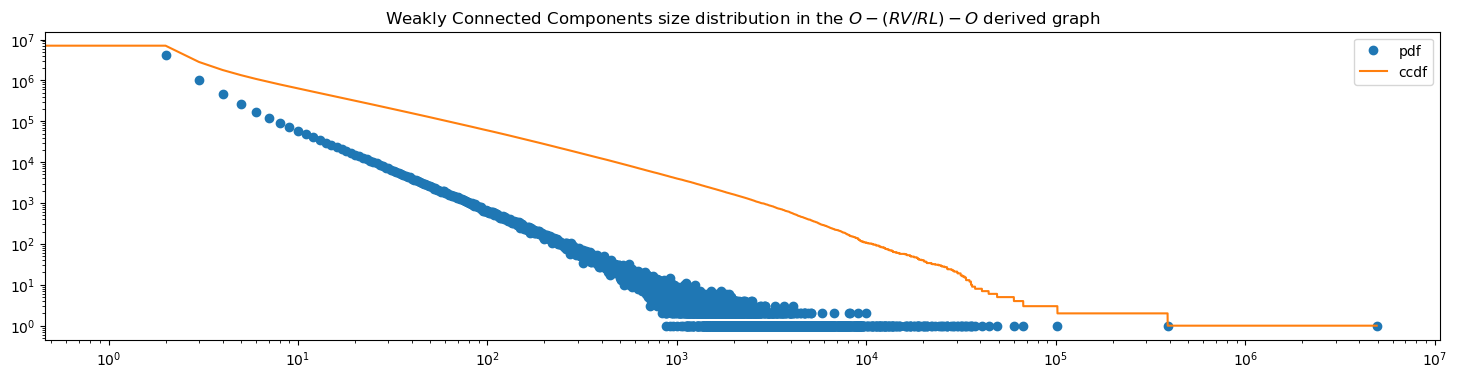

In [31]:
ti=time.time()
weakly_connected_components = list(nx.weakly_connected_components(G))
tf=time.time()
print(f'Weakly Connected Components Elapse {np.round(tf-ti)} (s) ')
print(f'___ # of components {len(weakly_connected_components):,}')
print(f'___ Average size {np.round(len(G.nodes)/len(weakly_connected_components),2)} (nodes)')
ti=time.time()
weakly_connected_components = list(nx.weakly_connected_components(G))
tf=time.time()

plt.figure(figsize=(18,4))
plt.title(r'Weakly Connected Components size distribution in the $O-(RV/RL)-O$ derived graph')
y=np.bincount([len(c) for c in weakly_connected_components])
x=np.arange(len(y))
plt.plot(x,y,"o",label="pdf")
plt.plot(x,np.cumsum(y[::-1])[::-1],label="ccdf")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

#### Strongly connected components

Strongly Connected Components Elapse 251.0 (s) 
___ # of components 62,513,171
___ Average size 1.0 (nodes)


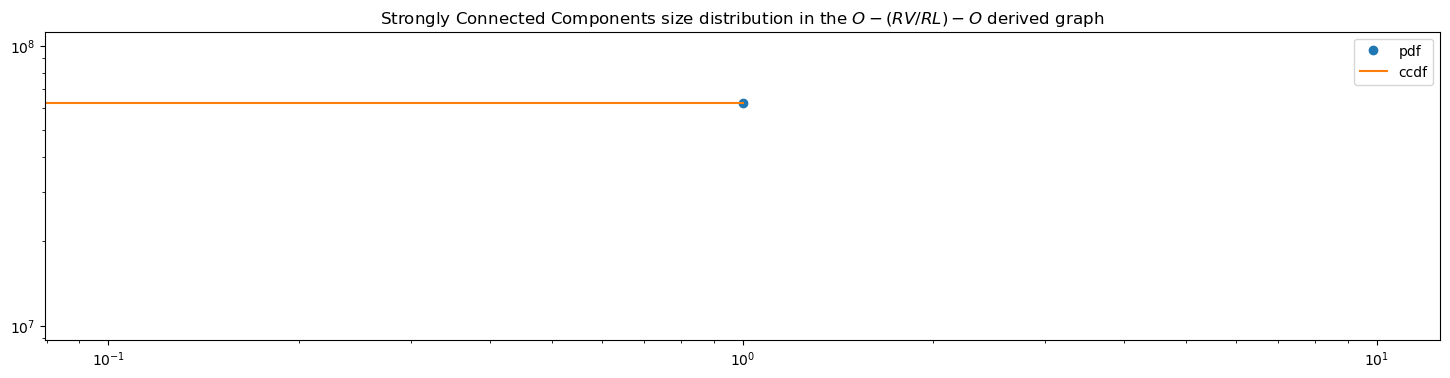

In [32]:
ti=time.time()
strongly_connected_components = list(nx.strongly_connected_components(G))
tf=time.time()
print(f'Strongly Connected Components Elapse {np.round(tf-ti)} (s) ')
print(f'___ # of components {len(strongly_connected_components):,}')
print(f'___ Average size {np.round(len(G.nodes)/len(strongly_connected_components),2)} (nodes)')

plt.figure(figsize=(18,4))
plt.title(r'Strongly Connected Components size distribution in the $O-(RV/RL)-O$ derived graph')
y=np.bincount([len(c) for c in strongly_connected_components])
x=np.arange(len(y))
plt.plot(x,y,"o",label="pdf")
plt.plot(x,np.cumsum(y[::-1])[::-1],label="ccdf")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

In both cases, no strongly connected components are observed.

- When edge direction follows the temporal partitioning, this reflects the fact that new edges can only point to nodes that were already created.
- When the arrow of time is used instead, this constraint no longer applies, although it is what we observed in this case.

In practice, the temporal partitioning, used to assign timestamps to origin nodes inherently prevents the formation of cycles. A more detailed discussion of this point—particularly concerning alternative forms of temporal partitioning—is left for future work.


### Bow-tie-like structure

In the case of networks with strongly connected components, the existence of a giant component has led to a specific representation, referred to as the "bow-tie" structure (Broder et al 2020). This representation highlights the relative weights of different types of nodes by distinguishing their attachment to the giant component (or lack thereof) and categorizing nodes based on the directed paths that may exist.

The topological partitioning `TSL` is particular:
- Weakly connected components include, where applicable, types such that $L=1$ and ($T\ge1$ or $S\ge1$).
- strongly connected components, if they exist, can only be composed of nodes of type `111` (or more generally, `TSL` nodes with $L=1$, $T\ge 1$, and $S \ge 1$).

From this, we can deduce a representation of the `TSL` graph by analogy with the bow-tie structure, which remains meaningful even in the absence of a strongly connected component.

We display some of these results with $\delta_{max}=1$ (used to build Fig. 5 discussed in the article) and a mix of $\delta_{max}=1$ and $\delta_{max}=2$, illustrating how the "depth" ($\delta_{max}$) parameter in the $TSL$ (topological) partitioning can be used.

Specifically, this is shown by leveraging the fact that all nodes of type $111(1)$ (i.e., $\delta_{max}=1$) can only belong to one of four different types in the $TSL$ partitioning with $\delta_{max}=2$ (i.e., $111(2)$, $121(2)$, $211(2)$, and $221(2)$).

In [25]:
statsoutput={}
for depth in [1,2]:
    filename=exportpath+"TSL_O-O-"+InheritancePath+"-ORI-depth="+str(depth)+"_20241010.pkl"
    statsoutput[depth]=pickle.load(open(filename,"rb"))

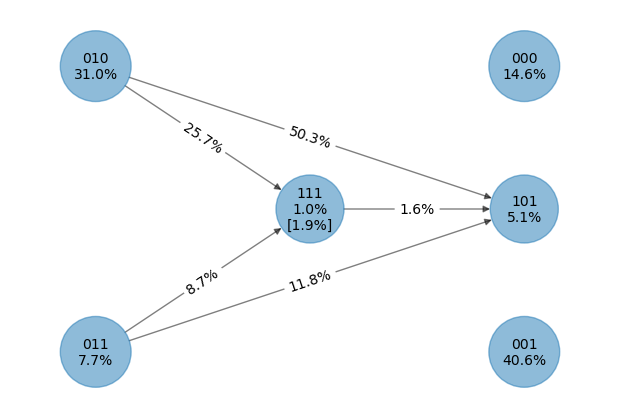

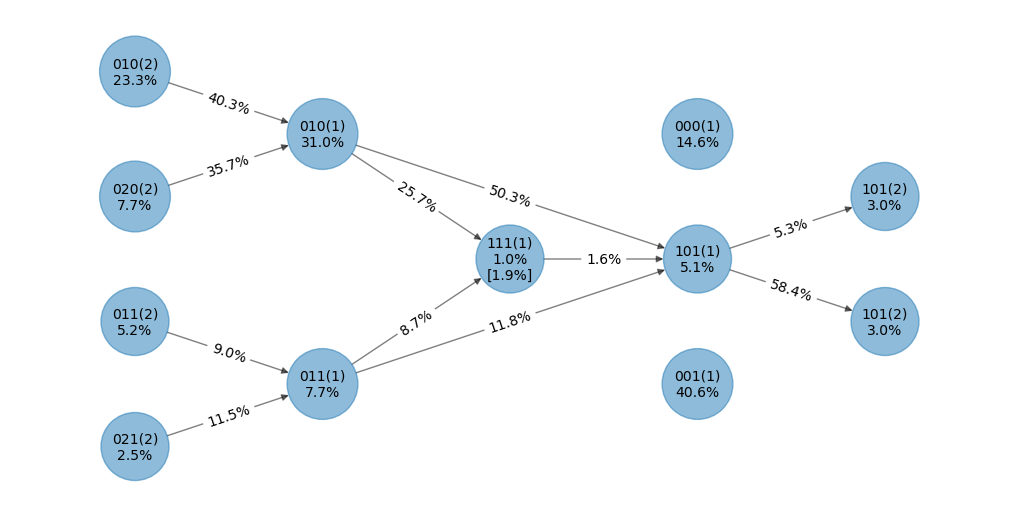

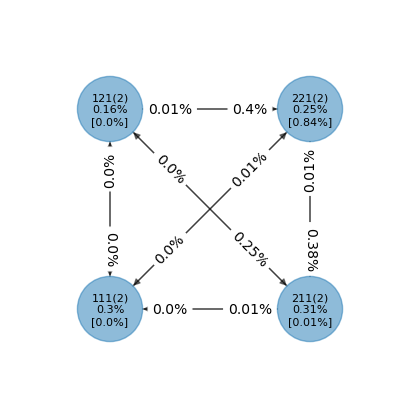

In [1009]:
DisplayTSLGraph_Delta_1(statsoutput)

DisplayTSLGraph_Delta_1_2(statsoutput)


## g) $TSL$ partitioning and scale invariant distribution

We may ask why $TSL$ partitioning, as a generalization of topological partitioning, is useful for studying the dynamic properties of growing networks, especially those that may (or may not) exhibit scale-invariant behavior.

By differentiating nodes based on their in- and out-degrees, this method naturally filters out young or low-degree nodes that have not yet evolved enough, under the attachment rules, to become significantly attractive—though they may act as reservoirs for future growth.

In large real-world growing networks, this partitioning reveals distinct evolutionary patterns across subcategories that would otherwise remain "invisible" due to the lack of native information distinguishing node types.

Crucially, it does not rely on prior knowledge of the underlying rules—an advantage when, as in our case, some nodes lack native temporal data.

As a generic method combining topological and temporal partitionings, it provides a structured entry point for analyzing "microscopic" evolution rules, before applying more advanced tools to investigate, where appropriate, scale-invariant properties.
